In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import imblearn as imb

In [2]:
df = pd.read_csv("/Users/vellankisuryatejareddy/Desktop/PCOS/PCOS_data.csv")

In [3]:
df.shape

(541, 45)

In [4]:
pd.set_option('display.max_columns',None)

In [5]:
df.head()

Sl. No  Patient File No.  PCOS (Y/N)   Age (yrs)  Weight (Kg)  Height(Cm)   \
0       1                 1           0          28         44.6        152.0   
1       2                 2           0          36         65.0        161.5   
2       3                 3           1          33         68.8        165.0   
3       4                 4           0          37         65.0        148.0   
4       5                 5           0          25         52.0        161.0   

    BMI  Blood Group  Pulse rate(bpm)   RR (breaths/min)  Hb(g/dl)  \
0  19.3           15                78                22     10.48   
1  24.9           15                74                20     11.70   
2  25.3           11                72                18     11.80   
3  29.7           13                72                20     12.00   
4  20.1           11                72                18     10.00   

   Cycle(R/I)  Cycle length(days)  Marraige Status (Yrs)  Pregnant(Y/N)  \
0           2                   5                    7.0              0   
1           2                   5                   11.0              1   
2           2                   5                   10.0              1   
3           2                   5                    4.0              0   
4           2                   5                    1.0              1   

   No. of abortions    I   beta-HCG(mIU/mL) II    beta-HCG(mIU/mL)  \
0                 0                    1.99                   1.99   
1                 0                   60.80                   1.99   
2                 0                  494.08                 494.08   
3                 0                    1.99                   1.99   
4                 0                  801.45                 801.45   

   FSH(mIU/mL)  LH(mIU/mL)  FSH/LH  Hip(inch)  Waist(inch)  Waist:Hip Ratio  \
0         7.95        3.68    2.16         36           30             0.83   
1         6.73        1.09    6.17         38           32             0.84   
2         5.54        0.88    6.30         40           36             0.90   
3         8.06        2.36    3.42         42           36             0.86   
4         3.98        0.90    4.42         37           30             0.81   

   TSH (mIU/L) AMH(ng/mL)  PRL(ng/mL)  Vit D3 (ng/mL)  PRG(ng/mL)  RBS(mg/dl)  \
0         0.68       2.07       45.16            17.1        0.57        92.0   
1         3.16       1.53       20.09            61.3        0.97        92.0   
2         2.54       6.63       10.52            49.7        0.36        84.0   
3        16.41       1.22       36.90            33.4        0.36        76.0   
4         3.57       2.26       30.09            43.8        0.38        84.0   

   Weight gain(Y/N)  hair growth(Y/N)  Skin darkening (Y/N)  Hair loss(Y/N)  \
0                 0                 0                     0               0   
1                 0                 0                     0               0   
2                 0                 0                     0               1   
3                 0                 0                     0               0   
4                 0                 0                     0               1   

   Pimples(Y/N)  Fast food (Y/N)  Reg.Exercise(Y/N)  BP _Systolic (mmHg)  \
0             0              1.0                  0                  110   
1             0              0.0                  0                  120   
2             1              1.0                  0                  120   
3             0              0.0                  0                  120   
4             0              0.0                  0                  120   

   BP _Diastolic (mmHg)  Follicle No. (L)  Follicle No. (R)  \
0                    80                 3                 3   
1                    70                 3                 5   
2                    80                13                15   
3                    70                 2                 2   
4             

In [6]:
df.tail()

Sl. No  Patient File No.  PCOS (Y/N)   Age (yrs)  Weight (Kg)  \
536     537               537           0          35         50.0   
537     538               538           0          30         63.2   
538     539               539           0          36         54.0   
539     540               540           0          27         50.0   
540     541               541           1          23         82.0   

     Height(Cm)    BMI  Blood Group  Pulse rate(bpm)   RR (breaths/min)  \
536      164.592  18.5           17                72                16   
537      158.000  25.3           15                72                18   
538      152.000  23.4           13                74                20   
539      150.000  22.2           15                74                20   
540      165.000  30.1           13                80                20   

     Hb(g/dl)  Cycle(R/I)  Cycle length(days)  Marraige Status (Yrs)  \
536      11.0           2                   5                    8.0   
537      10.8           2                   5                    4.0   
538      10.8           2                   6                    8.0   
539      12.0           4                   2                    2.0   
540      10.2           4                   7                    2.0   

     Pregnant(Y/N)  No. of abortions    I   beta-HCG(mIU/mL)  \
536              0                 1                    1.99   
537              1                 1                   80.13   
538              0                 0                    1.99   
539              0                 0                  292.92   
540              0                 0                    1.99   

    II    beta-HCG(mIU/mL)  FSH(mIU/mL)  LH(mIU/mL)  FSH/LH  Hip(inch)  \
536                   1.99        10.06        1.81    5.56         28   
537                   1.99         5.07        2.84    1.79         34   
538                   1.99        11.96        2.78    4.30         30   
539                   1.99         4.40        4.33    1.02         28   
540                   1.99         3.99        4.30    0.93         48   

     Waist(inch)  Waist:Hip Ratio  TSH (mIU/L) AMH(ng/mL)  PRL(ng/mL)  \
536           26             0.93         1.11        1.7        5.30   
537           32             0.94         2.05        5.6       21.09   
538           28             0.93         2.87        3.7       96.41   
539           26             0.93         2.50        5.2       38.89   
540           46             0.96         1.66         20       20.74   

     Vit D3 (ng/mL)  PRG(ng/mL)  RBS(mg/dl)  Weight gain(Y/N)  \
536            36.6        0.25        92.0                 0   
537            23.0        0.25       108.0                 1   
538            22.5        0.25        92.0                 0   
539            22.4        0.25       115.0                 0   
540            17.4        0.37       108.0                 1   

     hair growth(Y/N)  Skin darkening (Y/N)  Hair loss(Y/N)  Pimples(Y/N)  \
536                 0                     0               0             0   
537                 0                     0               0             0   
538                 0                     0               0             0   
539                 0                     0               0             1   
540                 1                     1               1             1   

     Fast food (Y/N)  Reg.Exercise(Y/N)  BP _Systolic (mmHg)  \
536              0.0                  0                  110   
537              0.0                  0                  110   
538              0.0                  0                  110   
539              0.0                  0                  110   
540              1.0                  0                  120   

     BP _Diastolic (mmHg)  Follicle No. (L)  Follicle No. (R)  \
536                    70                 1                 0   
537                    70                 9                 7 

In [7]:
df

Sl. No  Patient File No.  PCOS (Y/N)   Age (yrs)  Weight (Kg)  \
0         1                 1           0          28         44.6   
1         2                 2           0          36         65.0   
2         3                 3           1          33         68.8   
3         4                 4           0          37         65.0   
4         5                 5           0          25         52.0   
..      ...               ...         ...         ...          ...   
536     537               537           0          35         50.0   
537     538               538           0          30         63.2   
538     539               539           0          36         54.0   
539     540               540           0          27         50.0   
540     541               541           1          23         82.0   

     Height(Cm)    BMI  Blood Group  Pulse rate(bpm)   RR (breaths/min)  \
0        152.000  19.3           15                78                22   
1        161.500  24.9           15                74                20   
2        165.000  25.3           11                72                18   
3        148.000  29.7           13                72                20   
4        161.000  20.1           11                72                18   
..           ...   ...          ...               ...               ...   
536      164.592  18.5           17                72                16   
537      158.000  25.3           15                72                18   
538      152.000  23.4           13                74                20   
539      150.000  22.2           15                74                20   
540      165.000  30.1           13                80                20   

     Hb(g/dl)  Cycle(R/I)  Cycle length(days)  Marraige Status (Yrs)  \
0       10.48           2                   5                    7.0   
1       11.70           2                   5                   11.0   
2       11.80           2                   5                   10.0   
3       12.00           2                   5                    4.0   
4       10.00           2                   5                    1.0   
..        ...         ...                 ...                    ...   
536     11.00           2                   5                    8.0   
537     10.80           2                   5                    4.0   
538     10.80           2                   6                    8.0   
539     12.00           4                   2                    2.0   
540     10.20           4                   7                    2.0   

     Pregnant(Y/N)  No. of abortions    I   beta-HCG(mIU/mL)  \
0                0                 0                    1.99   
1                1                 0                   60.80   
2                1                 0                  494.08   
3                0                 0                    1.99   
4                1                 0                  801.45   
..             ...               ...                     ...   
536              0                 1                    1.99   
537              1                 1                   80.13   
538              0                 0                    1.99   
539              0                 0                  292.92   
540              0                 0                    1.99   

    II    beta-HCG(mIU/mL)  FSH(mIU/mL)  LH(mIU/mL)  FSH/LH  Hip(inch)  \
0                     1.99         7.95        3.68    2.16         36   
1                     1.99         6.73        1.09    6.17         38   
2                   494.08         5.54        0.88    6.30         40   
3                     1.99         8.06        2.36    3.42         42   
4                   801.45         3.98        0.90    4.42         37   
..                     ...          ...         ...     ...        ...   
536                   1.99        10.06        1.81    5.56         28   
537                   1.99         5.

In [8]:
df.sample(5,random_state=100)

Sl. No  Patient File No.  PCOS (Y/N)   Age (yrs)  Weight (Kg)  \
485     486               486           0          30         44.8   
188     189               189           0          28         76.0   
302     303               303           0          26         64.0   
78       79                79           0          37         48.0   
260     261               261           0          38         34.0   

     Height(Cm)    BMI  Blood Group  Pulse rate(bpm)   RR (breaths/min)  \
485        157.0  18.2           15                80                20   
188        154.0  32.0           16                72                20   
302        153.0  27.3           17                72                18   
78         150.0  21.3           11                75                20   
260        153.0  14.5           13                72                18   

     Hb(g/dl)  Cycle(R/I)  Cycle length(days)  Marraige Status (Yrs)  \
485      10.0           2                   5                    9.0   
188      12.5           2                   6                    8.0   
302      12.0           4                   3                    3.0   
78       10.2           2                   5                    2.0   
260      14.8           2                   5                    8.0   

     Pregnant(Y/N)  No. of abortions    I   beta-HCG(mIU/mL)  \
485              1                 0                 1238.40   
188              1                 0                  108.66   
302              0                 0                    1.99   
78               0                 1                    1.99   
260              0                 1                    1.99   

    II    beta-HCG(mIU/mL)  FSH(mIU/mL)  LH(mIU/mL)  FSH/LH  Hip(inch)  \
485                  237.5         1.00       0.100   10.00         34   
188                 108.66         6.53       3.620    1.80         40   
302                   1.99         5.14       8.170    0.63         34   
78                    1.99        15.45       4.364    3.54         38   
260                   1.99         2.95       0.490    6.02         32   

     Waist(inch)  Waist:Hip Ratio  TSH (mIU/L) AMH(ng/mL)  PRL(ng/mL)  \
485           30             0.88         3.26       0.72       44.42   
188           34             0.85         2.92       3.99        6.72   
302           31             0.91         1.10       18.7       31.83   
78            34             0.89         1.20       4.91       17.05   
260           30             0.94         2.61        4.2       30.24   

     Vit D3 (ng/mL)  PRG(ng/mL)  RBS(mg/dl)  Weight gain(Y/N)  \
485           33.30        0.25        91.0                 0   
188           21.00        0.57       116.0                 0   
302           30.00        0.46       135.0                 0   
78            29.47        0.52        98.0                 0   
260           24.60        0.39       100.0                 0   

     hair growth(Y/N)  Skin darkening (Y/N)  Hair loss(Y/N)  Pimples(Y/N)  \
485                 0                     0               0             0   
188                 1                     0               1             0   
302                 0                     0               1             0   
78                  0                     0               0             0   
260                 0                     0               1             0   

     Fast food (Y/N)  Reg.Exercise(Y/N)  BP _Systolic (mmHg)  \
485              1.0                  1                  110   
188              1.0                  0                  120   
302              0.0                  1                  120   
78               0.0                  0                  110   
260              1.0                  0                  130   

     BP _Diastolic (mmHg)  Follicle No. (L)  Follicle No. (R)  \
485                    80                 2                 4   
188                    80                 1                 2 

In [9]:
df.isna().sum()

Sl. No                      0
Patient File No.            0
PCOS (Y/N)                  0
 Age (yrs)                  0
Weight (Kg)                 0
Height(Cm)                  0
BMI                         0
Blood Group                 0
Pulse rate(bpm)             0
RR (breaths/min)            0
Hb(g/dl)                    0
Cycle(R/I)                  0
Cycle length(days)          0
Marraige Status (Yrs)       1
Pregnant(Y/N)               0
No. of abortions            0
  I   beta-HCG(mIU/mL)      0
II    beta-HCG(mIU/mL)      0
FSH(mIU/mL)                 0
LH(mIU/mL)                  0
FSH/LH                      0
Hip(inch)                   0
Waist(inch)                 0
Waist:Hip Ratio             0
TSH (mIU/L)                 0
AMH(ng/mL)                  0
PRL(ng/mL)                  0
Vit D3 (ng/mL)              0
PRG(ng/mL)                  0
RBS(mg/dl)                  0
Weight gain(Y/N)            0
hair growth(Y/N)            0
Skin darkening (Y/N)        0
Hair loss(

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3    Age (yrs)              541 non-null    int64  
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     541 non-null    float64
 7   Blood Group             541 non-null    int64  
 8   Pulse rate(bpm)         541 non-null    int64  
 9   RR (breaths/min)        541 non-null    int64  
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    int64  
 12  Cycle length(days)      541 non-null    int64  
 13  Marraige Status (Yrs)   540 non-null    float64
 14  Pregnant(Y/N)           541 non-null    in

In [11]:
df.describe()

Sl. No  Patient File No.  PCOS (Y/N)   Age (yrs)  Weight (Kg)  \
count  541.000000        541.000000  541.000000  541.000000   541.000000   
mean   271.000000        271.000000    0.327172   31.430684    59.637153   
std    156.317519        156.317519    0.469615    5.411006    11.028287   
min      1.000000          1.000000    0.000000   20.000000    31.000000   
25%    136.000000        136.000000    0.000000   28.000000    52.000000   
50%    271.000000        271.000000    0.000000   31.000000    59.000000   
75%    406.000000        406.000000    1.000000   35.000000    65.000000   
max    541.000000        541.000000    1.000000   48.000000   108.000000   

       Height(Cm)          BMI  Blood Group  Pulse rate(bpm)   \
count   541.000000  541.000000   541.000000        541.000000   
mean    156.484835   24.307579    13.802218         73.247689   
std       6.033545    4.055129     1.840812          4.430285   
min     137.000000   12.400000    11.000000         13.000000   
25%     152.000000   21.600000    13.000000         72.000000   
50%     156.000000   24.200000    14.000000         72.000000   
75%     160.000000   26.600000    15.000000         74.000000   
max     180.000000   38.900000    18.000000         82.000000   

       RR (breaths/min)    Hb(g/dl)  Cycle(R/I)  Cycle length(days)  \
count        541.000000  541.000000  541.000000           541.00000   
mean          19.243993   11.160037    2.560074             4.94085   
std            1.688629    0.866904    0.901950             1.49202   
min           16.000000    8.500000    2.000000             0.00000   
25%           18.000000   10.500000    2.000000             4.00000   
50%           18.000000   11.000000    2.000000             5.00000   
75%           20.000000   11.700000    4.000000             5.00000   
max           28.000000   14.800000    5.000000            12.00000   

       Marraige Status (Yrs)  Pregnant(Y/N)  No. of abortions  \
count             540.000000     541.000000        541.000000   
mean                7.680926       0.380776          0.288355   
std                 4.803835       0.486027          0.692575   
min                 0.000000       0.000000          0.000000   
25%                 4.000000       0.000000          0.000000   
50%                 7.000000       0.000000          0.000000   
75%                10.000000       1.000000          0.000000   
max                30.000000       1.000000          5.000000   

         I   beta-HCG(mIU/mL)  FSH(mIU/mL)   LH(mIU/mL)       FSH/LH  \
count              541.000000   541.000000   541.000000   541.000000   
mean               664.549235    14.601832     6.469919     6.904917   
std               3348.920576   217.022081    86.673255    60.691982   
min                  1.300000     0.210000     0.020000     0.000000   
25%                  1.990000     3.300000     1.020000     1.420000   
50%                 20.000000     4.850000     2.300000     2.170000   
75%                297.210000     6.410000     3.680000     3.960000   
max              32460.970000  5052.000000  2018.000000  1372.830000   

        Hip(inch)  Waist(inch)  Waist:Hip Ratio  TSH (mIU/L)  PRL(ng/mL)  \
count  541.000000   541.000000       541.000000   541.000000  541.000000   
mean    37.992606    33.841035         0.891627     2.981281   24.321497   
std      3.967920     3.596894         0.046135     3.755532   14.970391   
min     26.000000    24.000000         0.760000     0.040000    0.400000   
25%     36.000000    32.000000         0.860000     1.480000   14.520000   
50%     38.000000    34.000000         0.890000     2.260000   21.920000   
75%     40.000000    36.000000         0.930000     3.570000   29.890000   
max     48.000000    47.000000         0.980000    65.000000  128.240000   

       Vit D3 (ng/mL)  PRG(ng/mL)  RBS(mg/dl)  Weight gain(Y/N)  \
count      541.000000  541.000000  541.000000        541.000000   
mean        49.915874    0.610945   99.835860 

In [12]:
df.head()

Sl. No  Patient File No.  PCOS (Y/N)   Age (yrs)  Weight (Kg)  Height(Cm)   \
0       1                 1           0          28         44.6        152.0   
1       2                 2           0          36         65.0        161.5   
2       3                 3           1          33         68.8        165.0   
3       4                 4           0          37         65.0        148.0   
4       5                 5           0          25         52.0        161.0   

    BMI  Blood Group  Pulse rate(bpm)   RR (breaths/min)  Hb(g/dl)  \
0  19.3           15                78                22     10.48   
1  24.9           15                74                20     11.70   
2  25.3           11                72                18     11.80   
3  29.7           13                72                20     12.00   
4  20.1           11                72                18     10.00   

   Cycle(R/I)  Cycle length(days)  Marraige Status (Yrs)  Pregnant(Y/N)  \
0           2                   5                    7.0              0   
1           2                   5                   11.0              1   
2           2                   5                   10.0              1   
3           2                   5                    4.0              0   
4           2                   5                    1.0              1   

   No. of abortions    I   beta-HCG(mIU/mL) II    beta-HCG(mIU/mL)  \
0                 0                    1.99                   1.99   
1                 0                   60.80                   1.99   
2                 0                  494.08                 494.08   
3                 0                    1.99                   1.99   
4                 0                  801.45                 801.45   

   FSH(mIU/mL)  LH(mIU/mL)  FSH/LH  Hip(inch)  Waist(inch)  Waist:Hip Ratio  \
0         7.95        3.68    2.16         36           30             0.83   
1         6.73        1.09    6.17         38           32             0.84   
2         5.54        0.88    6.30         40           36             0.90   
3         8.06        2.36    3.42         42           36             0.86   
4         3.98        0.90    4.42         37           30             0.81   

   TSH (mIU/L) AMH(ng/mL)  PRL(ng/mL)  Vit D3 (ng/mL)  PRG(ng/mL)  RBS(mg/dl)  \
0         0.68       2.07       45.16            17.1        0.57        92.0   
1         3.16       1.53       20.09            61.3        0.97        92.0   
2         2.54       6.63       10.52            49.7        0.36        84.0   
3        16.41       1.22       36.90            33.4        0.36        76.0   
4         3.57       2.26       30.09            43.8        0.38        84.0   

   Weight gain(Y/N)  hair growth(Y/N)  Skin darkening (Y/N)  Hair loss(Y/N)  \
0                 0                 0                     0               0   
1                 0                 0                     0               0   
2                 0                 0                     0               1   
3                 0                 0                     0               0   
4                 0                 0                     0               1   

   Pimples(Y/N)  Fast food (Y/N)  Reg.Exercise(Y/N)  BP _Systolic (mmHg)  \
0             0              1.0                  0                  110   
1             0              0.0                  0                  120   
2             1              1.0                  0                  120   
3             0              0.0                  0                  120   
4             0              0.0                  0                  120   

   BP _Diastolic (mmHg)  Follicle No. (L)  Follicle No. (R)  \
0                    80                 3                 3   
1                    70                 3                 5   
2                    80                13                15   
3                    70                 2                 2   
4             

In [13]:
df.drop(['Sl. No','Patient File No.','Unnamed: 44'],axis=1,inplace=True)

In [14]:
df.head()

PCOS (Y/N)   Age (yrs)  Weight (Kg)  Height(Cm)    BMI  Blood Group  \
0           0          28         44.6        152.0  19.3           15   
1           0          36         65.0        161.5  24.9           15   
2           1          33         68.8        165.0  25.3           11   
3           0          37         65.0        148.0  29.7           13   
4           0          25         52.0        161.0  20.1           11   

   Pulse rate(bpm)   RR (breaths/min)  Hb(g/dl)  Cycle(R/I)  \
0                78                22     10.48           2   
1                74                20     11.70           2   
2                72                18     11.80           2   
3                72                20     12.00           2   
4                72                18     10.00           2   

   Cycle length(days)  Marraige Status (Yrs)  Pregnant(Y/N)  No. of abortions  \
0                   5                    7.0              0                 0   
1                   5                   11.0              1                 0   
2                   5                   10.0              1                 0   
3                   5                    4.0              0                 0   
4                   5                    1.0              1                 0   

     I   beta-HCG(mIU/mL) II    beta-HCG(mIU/mL)  FSH(mIU/mL)  LH(mIU/mL)  \
0                    1.99                   1.99         7.95        3.68   
1                   60.80                   1.99         6.73        1.09   
2                  494.08                 494.08         5.54        0.88   
3                    1.99                   1.99         8.06        2.36   
4                  801.45                 801.45         3.98        0.90   

   FSH/LH  Hip(inch)  Waist(inch)  Waist:Hip Ratio  TSH (mIU/L) AMH(ng/mL)  \
0    2.16         36           30             0.83         0.68       2.07   
1    6.17         38           32             0.84         3.16       1.53   
2    6.30         40           36             0.90         2.54       6.63   
3    3.42         42           36             0.86        16.41       1.22   
4    4.42         37           30             0.81         3.57       2.26   

   PRL(ng/mL)  Vit D3 (ng/mL)  PRG(ng/mL)  RBS(mg/dl)  Weight gain(Y/N)  \
0       45.16            17.1        0.57        92.0                 0   
1       20.09            61.3        0.97        92.0                 0   
2       10.52            49.7        0.36        84.0                 0   
3       36.90            33.4        0.36        76.0                 0   
4       30.09            43.8        0.38        84.0                 0   

   hair growth(Y/N)  Skin darkening (Y/N)  Hair loss(Y/N)  Pimples(Y/N)  \
0                 0                     0               0             0   
1                 0                     0               0             0   
2                 0                     0               1             1   
3                 0                     0               0             0   
4                 0                     0               1             0   

   Fast food (Y/N)  Reg.Exercise(Y/N)  BP _Systolic (mmHg)  \
0              1.0                  0                  110   
1              0.0                  0                  120   
2              1.0                  0                  120   
3              0.0                  0                  120   
4              0.0                  0                  120   

   BP _Diastolic (mmHg)  Follicle No. (L)  Follicle No. (R)  \
0                    80                 3                 3   
1                    70                 3                 5   
2                    80                13                15   
3                    70                 2                 2   
4                    80                 3                 4   

   Avg. F size (L) (mm)  Avg. F size (R) (mm)  Endometrium (mm)  
0                  18.0                 

In [15]:
df.isna().sum()

PCOS (Y/N)                0
 Age (yrs)                0
Weight (Kg)               0
Height(Cm)                0
BMI                       0
Blood Group               0
Pulse rate(bpm)           0
RR (breaths/min)          0
Hb(g/dl)                  0
Cycle(R/I)                0
Cycle length(days)        0
Marraige Status (Yrs)     1
Pregnant(Y/N)             0
No. of abortions          0
  I   beta-HCG(mIU/mL)    0
II    beta-HCG(mIU/mL)    0
FSH(mIU/mL)               0
LH(mIU/mL)                0
FSH/LH                    0
Hip(inch)                 0
Waist(inch)               0
Waist:Hip Ratio           0
TSH (mIU/L)               0
AMH(ng/mL)                0
PRL(ng/mL)                0
Vit D3 (ng/mL)            0
PRG(ng/mL)                0
RBS(mg/dl)                0
Weight gain(Y/N)          0
hair growth(Y/N)          0
Skin darkening (Y/N)      0
Hair loss(Y/N)            0
Pimples(Y/N)              0
Fast food (Y/N)           1
Reg.Exercise(Y/N)         0
BP _Systolic (mmHg) 

In [16]:
df.sample(5,random_state=123)

PCOS (Y/N)   Age (yrs)  Weight (Kg)  Height(Cm)    BMI  Blood Group  \
258           0          43         33.0      152.000  14.3           15   
513           0          21         55.0      158.496  21.9           16   
297           0          20         52.0      150.000  23.1           15   
328           1          30         65.0      161.000  25.1           11   
156           0          27         53.2      158.000  21.3           13   

     Pulse rate(bpm)   RR (breaths/min)  Hb(g/dl)  Cycle(R/I)  \
258                72                18      11.1           2   
513                72                18      11.5           2   
297                72                18      10.5           2   
328                70                18      11.0           4   
156                72                22      10.5           4   

     Cycle length(days)  Marraige Status (Yrs)  Pregnant(Y/N)  \
258                   6                    6.0              0   
513                   5                    3.0              0   
297                   6                    3.0              0   
328                   2                    7.0              1   
156                   4                    5.0              0   

     No. of abortions    I   beta-HCG(mIU/mL) II    beta-HCG(mIU/mL)  \
258                 0                  221.28                   1.99   
513                 0                    1.99                   1.99   
297                 0                    1.99                   1.99   
328                 0                  336.95                     12   
156                 0                    1.99                   1.99   

     FSH(mIU/mL)  LH(mIU/mL)  FSH/LH  Hip(inch)  Waist(inch)  Waist:Hip Ratio  \
258        12.28        2.52    4.87         30           28             0.93   
513         8.55        2.53    3.38         40           38             0.95   
297         4.87        3.61    1.35         34           32             0.94   
328         6.86       14.24    0.48         39           34             0.87   
156         3.09        0.59    5.24         37           32             0.86   

     TSH (mIU/L) AMH(ng/mL)  PRL(ng/mL)  Vit D3 (ng/mL)  PRG(ng/mL)  \
258         1.25        0.8       10.99            22.4        0.25   
513         1.79        2.2       17.23            13.8        0.23   
297         2.93        4.5       20.18            27.0        0.34   
328         2.32       15.7        8.78            18.7        0.32   
156         2.03       5.27        7.16            25.3        0.36   

     RBS(mg/dl)  Weight gain(Y/N)  hair growth(Y/N)  Skin darkening (Y/N)  \
258       100.0                 0                 0                     0   
513       100.0                 0                 0                     0   
297        88.0                 0                 0                     0   
328       100.0                 1                 1                     1   
156        91.0                 0                 0                     1   

     Hair loss(Y/N)  Pimples(Y/N)  Fast food (Y/N)  Reg.Exercise(Y/N)  \
258               1             1              1.0                  1   
513               0             0              0.0                  0   
297               1             1              1.0                  0   
328               0             1              1.0                  0   
156               1             0              NaN                  1   

     BP _Systolic (mmHg)  BP _Diastolic (mmHg)  Follicle No. (L)  \
258                  120                    80                 9   
513                  120                    80                 1   
297                  110                    70                 7   
328                  110                    80                 7   
156                  120                    70                 5   

     Follicle No. (R)  Avg. F size (L) (mm)  Avg. F size (R) (mm)  \
258                 8                  

In [17]:
df.columns

Index(['PCOS (Y/N)', ' Age (yrs)', 'Weight (Kg)', 'Height(Cm) ', 'BMI',
       'Blood Group', 'Pulse rate(bpm) ', 'RR (breaths/min)', 'Hb(g/dl)',
       'Cycle(R/I)', 'Cycle length(days)', 'Marraige Status (Yrs)',
       'Pregnant(Y/N)', 'No. of abortions', '  I   beta-HCG(mIU/mL)',
       'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)', 'LH(mIU/mL)', 'FSH/LH',
       'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio', 'TSH (mIU/L)',
       'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)', 'PRG(ng/mL)',
       'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)'],
      dtype='object')

In [18]:
df = df.rename(columns={'PCOS (Y/N)':'PCOS',' Age (yrs)':'Age','Weight (Kg)':'Weight','Height(Cm) ':'Height','Pulse rate(bpm) ':'Pulse Rate','RR (breaths/min)':'Breaths/Min','Hb(g/dl)':'Hb','Marraige Status (Yrs)':'Marraige Years','Pregnant(Y/N)':'Pregnant','  I   beta-HCG(mIU/mL)':'I beta-HCG','II    beta-HCG(mIU/mL)':'II beta-HCG','FSH(mIU/mL)':'FSH','LH(mIU/mL)':'LH','TSH (mIU/L)':'TSH','AMH(ng/mL)':'AMH','PRL(ng/mL)':'PRL','Vit D3 (ng/mL)':'Vit D3','PRG(ng/mL)':'PRG','RBS(mg/dl)':'RBS','Weight gain(Y/N)':'Weight Gain','hair growth(Y/N)':'Hair Growth','Skin darkening (Y/N)':'Skin Darkening','Hair loss(Y/N)':'Hair Loss','Pimples(Y/N)':'Pimples','Fast food (Y/N)':'Fast Food','Reg.Exercise(Y/N)':'Regular Exercise','BP _Systolic (mmHg)':'BP _Systolic','BP _Diastolic (mmHg)':'BP _Diastolic','Follicle No. (L)':'Follicle No(L)','Follicle No. (R)':'Follicle No(R)','Avg. F size (L) (mm)':'Avg. F size (L)','Avg. F size (R) (mm)':'Avg. F size (R)','Endometrium (mm)':'Endometrium'})

In [19]:
df.head()

PCOS  Age  Weight  Height   BMI  Blood Group  Pulse Rate  Breaths/Min  \
0     0   28    44.6   152.0  19.3           15          78           22   
1     0   36    65.0   161.5  24.9           15          74           20   
2     1   33    68.8   165.0  25.3           11          72           18   
3     0   37    65.0   148.0  29.7           13          72           20   
4     0   25    52.0   161.0  20.1           11          72           18   

      Hb  Cycle(R/I)  Cycle length(days)  Marraige Years  Pregnant  \
0  10.48           2                   5             7.0         0   
1  11.70           2                   5            11.0         1   
2  11.80           2                   5            10.0         1   
3  12.00           2                   5             4.0         0   
4  10.00           2                   5             1.0         1   

   No. of abortions  I beta-HCG II beta-HCG   FSH    LH  FSH/LH  Hip(inch)  \
0                 0        1.99        1.99  7.95  3.68    2.16         36   
1                 0       60.80        1.99  6.73  1.09    6.17         38   
2                 0      494.08      494.08  5.54  0.88    6.30         40   
3                 0        1.99        1.99  8.06  2.36    3.42         42   
4                 0      801.45      801.45  3.98  0.90    4.42         37   

   Waist(inch)  Waist:Hip Ratio    TSH   AMH    PRL  Vit D3   PRG   RBS  \
0           30             0.83   0.68  2.07  45.16    17.1  0.57  92.0   
1           32             0.84   3.16  1.53  20.09    61.3  0.97  92.0   
2           36             0.90   2.54  6.63  10.52    49.7  0.36  84.0   
3           36             0.86  16.41  1.22  36.90    33.4  0.36  76.0   
4           30             0.81   3.57  2.26  30.09    43.8  0.38  84.0   

   Weight Gain  Hair Growth  Skin Darkening  Hair Loss  Pimples  Fast Food  \
0            0            0               0          0        0        1.0   
1            0            0               0          0        0        0.0   
2            0            0               0          1        1        1.0   
3            0            0               0          0        0        0.0   
4            0            0               0          1        0        0.0   

   Regular Exercise  BP _Systolic  BP _Diastolic  Follicle No(L)  \
0                 0           110             80               3   
1                 0           120             70               3   
2                 0           120             80              13   
3                 0           120             70               2   
4                 0           120             80               3   

   Follicle No(R)  Avg. F size (L)  Avg. F size (R)  Endometrium  
0               3             18.0             18.0          8.5  
1               5             15.0             14.0          3.7  
2              15             18.0             20.0         10.0  
3               2             15.0             14.0          7.5  
4               4             16.0             14.0          7.0

In [20]:
df[df.duplicated()]

Empty DataFrame
Columns: [PCOS, Age, Weight, Height, BMI, Blood Group, Pulse Rate, Breaths/Min, Hb, Cycle(R/I), Cycle length(days), Marraige Years, Pregnant, No. of abortions, I beta-HCG, II beta-HCG, FSH, LH, FSH/LH, Hip(inch), Waist(inch), Waist:Hip Ratio, TSH, AMH, PRL, Vit D3, PRG, RBS, Weight Gain, Hair Growth, Skin Darkening, Hair Loss, Pimples, Fast Food, Regular Exercise, BP _Systolic, BP _Diastolic, Follicle No(L), Follicle No(R), Avg. F size (L), Avg. F size (R), Endometrium]
Index: []

In [21]:
df['PCOS'].value_counts()

PCOS
0    364
1    177
Name: count, dtype: int64

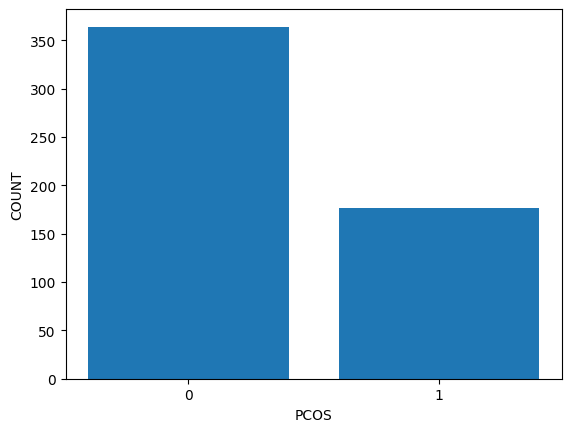

In [22]:
plt.bar(df['PCOS'].value_counts().index,df['PCOS'].value_counts().values)
plt.xlabel('PCOS')
plt.ylabel('COUNT')
plt.xticks(df['PCOS'].value_counts().index)
plt.show()

In [23]:
for col in df.columns:
  columns_included = ['PCOS','Cycle(R/I)','Cycle length(days)','Pregnant','No.of abortions','Weight Gain','Hair Growth','Skin Darkening','Hair Loss','Pimples','Fast Food','Regular Exercise']
  if col in columns_included:
    print(f"Column: {col}\nUnique Values: {df[col].unique()}")
    print('-'*50)

Column: PCOS
Unique Values: [0 1]
--------------------------------------------------
Column: Cycle(R/I)
Unique Values: [2 4 5]
--------------------------------------------------
Column: Cycle length(days)
Unique Values: [ 5  2  7  6  9  3  4  0 10  8 12 11]
--------------------------------------------------
Column: Pregnant
Unique Values: [0 1]
--------------------------------------------------
Column: Weight Gain
Unique Values: [0 1]
--------------------------------------------------
Column: Hair Growth
Unique Values: [0 1]
--------------------------------------------------
Column: Skin Darkening
Unique Values: [0 1]
--------------------------------------------------
Column: Hair Loss
Unique Values: [0 1]
--------------------------------------------------
Column: Pimples
Unique Values: [0 1]
--------------------------------------------------
Column: Fast Food
Unique Values: [ 1.  0. nan]
--------------------------------------------------
Column: Regular Exercise
Unique Values: [0 1]
-

In [24]:
df.head()

PCOS  Age  Weight  Height   BMI  Blood Group  Pulse Rate  Breaths/Min  \
0     0   28    44.6   152.0  19.3           15          78           22   
1     0   36    65.0   161.5  24.9           15          74           20   
2     1   33    68.8   165.0  25.3           11          72           18   
3     0   37    65.0   148.0  29.7           13          72           20   
4     0   25    52.0   161.0  20.1           11          72           18   

      Hb  Cycle(R/I)  Cycle length(days)  Marraige Years  Pregnant  \
0  10.48           2                   5             7.0         0   
1  11.70           2                   5            11.0         1   
2  11.80           2                   5            10.0         1   
3  12.00           2                   5             4.0         0   
4  10.00           2                   5             1.0         1   

   No. of abortions  I beta-HCG II beta-HCG   FSH    LH  FSH/LH  Hip(inch)  \
0                 0        1.99        1.99  7.95  3.68    2.16         36   
1                 0       60.80        1.99  6.73  1.09    6.17         38   
2                 0      494.08      494.08  5.54  0.88    6.30         40   
3                 0        1.99        1.99  8.06  2.36    3.42         42   
4                 0      801.45      801.45  3.98  0.90    4.42         37   

   Waist(inch)  Waist:Hip Ratio    TSH   AMH    PRL  Vit D3   PRG   RBS  \
0           30             0.83   0.68  2.07  45.16    17.1  0.57  92.0   
1           32             0.84   3.16  1.53  20.09    61.3  0.97  92.0   
2           36             0.90   2.54  6.63  10.52    49.7  0.36  84.0   
3           36             0.86  16.41  1.22  36.90    33.4  0.36  76.0   
4           30             0.81   3.57  2.26  30.09    43.8  0.38  84.0   

   Weight Gain  Hair Growth  Skin Darkening  Hair Loss  Pimples  Fast Food  \
0            0            0               0          0        0        1.0   
1            0            0               0          0        0        0.0   
2            0            0               0          1        1        1.0   
3            0            0               0          0        0        0.0   
4            0            0               0          1        0        0.0   

   Regular Exercise  BP _Systolic  BP _Diastolic  Follicle No(L)  \
0                 0           110             80               3   
1                 0           120             70               3   
2                 0           120             80              13   
3                 0           120             70               2   
4                 0           120             80               3   

   Follicle No(R)  Avg. F size (L)  Avg. F size (R)  Endometrium  
0               3             18.0             18.0          8.5  
1               5             15.0             14.0          3.7  
2              15             18.0             20.0         10.0  
3               2             15.0             14.0          7.5  
4               4             16.0             14.0          7.0

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 42 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PCOS                541 non-null    int64  
 1   Age                 541 non-null    int64  
 2   Weight              541 non-null    float64
 3   Height              541 non-null    float64
 4   BMI                 541 non-null    float64
 5   Blood Group         541 non-null    int64  
 6   Pulse Rate          541 non-null    int64  
 7   Breaths/Min         541 non-null    int64  
 8   Hb                  541 non-null    float64
 9   Cycle(R/I)          541 non-null    int64  
 10  Cycle length(days)  541 non-null    int64  
 11  Marraige Years      540 non-null    float64
 12  Pregnant            541 non-null    int64  
 13  No. of abortions    541 non-null    int64  
 14  I beta-HCG          541 non-null    float64
 15  II beta-HCG         541 non-null    object 
 16  FSH     

In [26]:
df['II beta-HCG'] = pd.to_numeric(df['II beta-HCG'],errors='coerce')

In [27]:
df['II beta-HCG'].dtype

dtype('float64')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 42 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PCOS                541 non-null    int64  
 1   Age                 541 non-null    int64  
 2   Weight              541 non-null    float64
 3   Height              541 non-null    float64
 4   BMI                 541 non-null    float64
 5   Blood Group         541 non-null    int64  
 6   Pulse Rate          541 non-null    int64  
 7   Breaths/Min         541 non-null    int64  
 8   Hb                  541 non-null    float64
 9   Cycle(R/I)          541 non-null    int64  
 10  Cycle length(days)  541 non-null    int64  
 11  Marraige Years      540 non-null    float64
 12  Pregnant            541 non-null    int64  
 13  No. of abortions    541 non-null    int64  
 14  I beta-HCG          541 non-null    float64
 15  II beta-HCG         540 non-null    float64
 16  FSH     

In [29]:
df['II beta-HCG'].isna().sum()

1

In [30]:
df['AMH'] = pd.to_numeric(df['AMH'],errors='coerce')

In [31]:
df['AMH'].dtype

dtype('float64')

In [32]:
df['AMH'].isna().sum()

1

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 42 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PCOS                541 non-null    int64  
 1   Age                 541 non-null    int64  
 2   Weight              541 non-null    float64
 3   Height              541 non-null    float64
 4   BMI                 541 non-null    float64
 5   Blood Group         541 non-null    int64  
 6   Pulse Rate          541 non-null    int64  
 7   Breaths/Min         541 non-null    int64  
 8   Hb                  541 non-null    float64
 9   Cycle(R/I)          541 non-null    int64  
 10  Cycle length(days)  541 non-null    int64  
 11  Marraige Years      540 non-null    float64
 12  Pregnant            541 non-null    int64  
 13  No. of abortions    541 non-null    int64  
 14  I beta-HCG          541 non-null    float64
 15  II beta-HCG         540 non-null    float64
 16  FSH     

In [34]:
df['Fast Food'] = df['Fast Food'].fillna(df['Fast Food'].mode()[0])

In [35]:
df['Fast Food'] = df['Fast Food'].astype('int64')

In [36]:
df['Fast Food'].dtype

dtype('int64')

In [37]:
df['Fast Food'].isna().sum()

0

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 42 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PCOS                541 non-null    int64  
 1   Age                 541 non-null    int64  
 2   Weight              541 non-null    float64
 3   Height              541 non-null    float64
 4   BMI                 541 non-null    float64
 5   Blood Group         541 non-null    int64  
 6   Pulse Rate          541 non-null    int64  
 7   Breaths/Min         541 non-null    int64  
 8   Hb                  541 non-null    float64
 9   Cycle(R/I)          541 non-null    int64  
 10  Cycle length(days)  541 non-null    int64  
 11  Marraige Years      540 non-null    float64
 12  Pregnant            541 non-null    int64  
 13  No. of abortions    541 non-null    int64  
 14  I beta-HCG          541 non-null    float64
 15  II beta-HCG         540 non-null    float64
 16  FSH     

In [39]:
df['Marraige Years'] = df['Marraige Years'].fillna(df['Marraige Years'].mean())

In [40]:
df['Marraige Years'].isna().sum()

0

In [41]:
df['II beta-HCG'] = df['II beta-HCG'].fillna(df['II beta-HCG'].mean())

In [42]:
df['II beta-HCG'].isna().sum()

0

In [43]:
df['AMH'] = df['AMH'].fillna(df['AMH'].mean())

In [44]:
df['AMH'].isna().sum()

0

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 42 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PCOS                541 non-null    int64  
 1   Age                 541 non-null    int64  
 2   Weight              541 non-null    float64
 3   Height              541 non-null    float64
 4   BMI                 541 non-null    float64
 5   Blood Group         541 non-null    int64  
 6   Pulse Rate          541 non-null    int64  
 7   Breaths/Min         541 non-null    int64  
 8   Hb                  541 non-null    float64
 9   Cycle(R/I)          541 non-null    int64  
 10  Cycle length(days)  541 non-null    int64  
 11  Marraige Years      541 non-null    float64
 12  Pregnant            541 non-null    int64  
 13  No. of abortions    541 non-null    int64  
 14  I beta-HCG          541 non-null    float64
 15  II beta-HCG         541 non-null    float64
 16  FSH     

In [46]:
df.isna().sum()

PCOS                  0
Age                   0
Weight                0
Height                0
BMI                   0
Blood Group           0
Pulse Rate            0
Breaths/Min           0
Hb                    0
Cycle(R/I)            0
Cycle length(days)    0
Marraige Years        0
Pregnant              0
No. of abortions      0
I beta-HCG            0
II beta-HCG           0
FSH                   0
LH                    0
FSH/LH                0
Hip(inch)             0
Waist(inch)           0
Waist:Hip Ratio       0
TSH                   0
AMH                   0
PRL                   0
Vit D3                0
PRG                   0
RBS                   0
Weight Gain           0
Hair Growth           0
Skin Darkening        0
Hair Loss             0
Pimples               0
Fast Food             0
Regular Exercise      0
BP _Systolic          0
BP _Diastolic         0
Follicle No(L)        0
Follicle No(R)        0
Avg. F size (L)       0
Avg. F size (R)       0
Endometrium     

In [47]:
categorical_columns = ['PCOS','Pregnant','No. of abortions','Weight Gain','Hair Growth','Skin Darkening','Hair Loss','Pimples','Fast Food','Regular Exercise']
df[categorical_columns] = df[categorical_columns].astype('category')

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 42 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   PCOS                541 non-null    category
 1   Age                 541 non-null    int64   
 2   Weight              541 non-null    float64 
 3   Height              541 non-null    float64 
 4   BMI                 541 non-null    float64 
 5   Blood Group         541 non-null    int64   
 6   Pulse Rate          541 non-null    int64   
 7   Breaths/Min         541 non-null    int64   
 8   Hb                  541 non-null    float64 
 9   Cycle(R/I)          541 non-null    int64   
 10  Cycle length(days)  541 non-null    int64   
 11  Marraige Years      541 non-null    float64 
 12  Pregnant            541 non-null    category
 13  No. of abortions    541 non-null    category
 14  I beta-HCG          541 non-null    float64 
 15  II beta-HCG         541 non-null    floa

**Univariate Analysis of Numerical Columns**

In [49]:
df.head()

PCOS  Age  Weight  Height   BMI  Blood Group  Pulse Rate  Breaths/Min  \
0    0   28    44.6   152.0  19.3           15          78           22   
1    0   36    65.0   161.5  24.9           15          74           20   
2    1   33    68.8   165.0  25.3           11          72           18   
3    0   37    65.0   148.0  29.7           13          72           20   
4    0   25    52.0   161.0  20.1           11          72           18   

      Hb  Cycle(R/I)  Cycle length(days)  Marraige Years Pregnant  \
0  10.48           2                   5             7.0        0   
1  11.70           2                   5            11.0        1   
2  11.80           2                   5            10.0        1   
3  12.00           2                   5             4.0        0   
4  10.00           2                   5             1.0        1   

  No. of abortions  I beta-HCG  II beta-HCG   FSH    LH  FSH/LH  Hip(inch)  \
0                0        1.99         1.99  7.95  3.68    2.16         36   
1                0       60.80         1.99  6.73  1.09    6.17         38   
2                0      494.08       494.08  5.54  0.88    6.30         40   
3                0        1.99         1.99  8.06  2.36    3.42         42   
4                0      801.45       801.45  3.98  0.90    4.42         37   

   Waist(inch)  Waist:Hip Ratio    TSH   AMH    PRL  Vit D3   PRG   RBS  \
0           30             0.83   0.68  2.07  45.16    17.1  0.57  92.0   
1           32             0.84   3.16  1.53  20.09    61.3  0.97  92.0   
2           36             0.90   2.54  6.63  10.52    49.7  0.36  84.0   
3           36             0.86  16.41  1.22  36.90    33.4  0.36  76.0   
4           30             0.81   3.57  2.26  30.09    43.8  0.38  84.0   

  Weight Gain Hair Growth Skin Darkening Hair Loss Pimples Fast Food  \
0           0           0              0         0       0         1   
1           0           0              0         0       0         0   
2           0           0              0         1       1         1   
3           0           0              0         0       0         0   
4           0           0              0         1       0         0   

  Regular Exercise  BP _Systolic  BP _Diastolic  Follicle No(L)  \
0                0           110             80               3   
1                0           120             70               3   
2                0           120             80              13   
3                0           120             70               2   
4                0           120             80               3   

   Follicle No(R)  Avg. F size (L)  Avg. F size (R)  Endometrium  
0               3             18.0             18.0          8.5  
1               5             15.0             14.0          3.7  
2              15             18.0             20.0         10.0  
3               2             15.0             14.0          7.5  
4               4             16.0             14.0          7.0

In [50]:
numerical_columns = df.select_dtypes(include=['int64','float64']).columns

In [51]:
numerical_columns

Index(['Age', 'Weight', 'Height', 'BMI', 'Blood Group', 'Pulse Rate',
       'Breaths/Min', 'Hb', 'Cycle(R/I)', 'Cycle length(days)',
       'Marraige Years', 'I beta-HCG', 'II beta-HCG', 'FSH', 'LH', 'FSH/LH',
       'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio', 'TSH', 'AMH', 'PRL',
       'Vit D3', 'PRG', 'RBS', 'BP _Systolic', 'BP _Diastolic',
       'Follicle No(L)', 'Follicle No(R)', 'Avg. F size (L)',
       'Avg. F size (R)', 'Endometrium'],
      dtype='object')

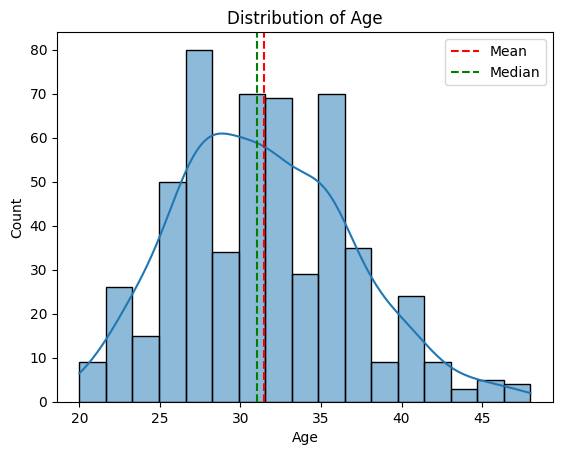

--------------------------------------------------


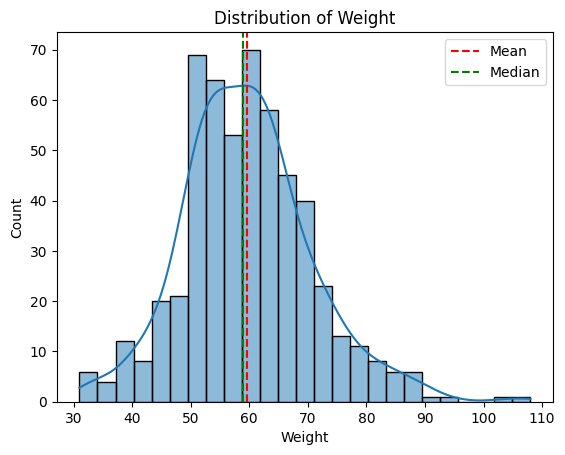

--------------------------------------------------


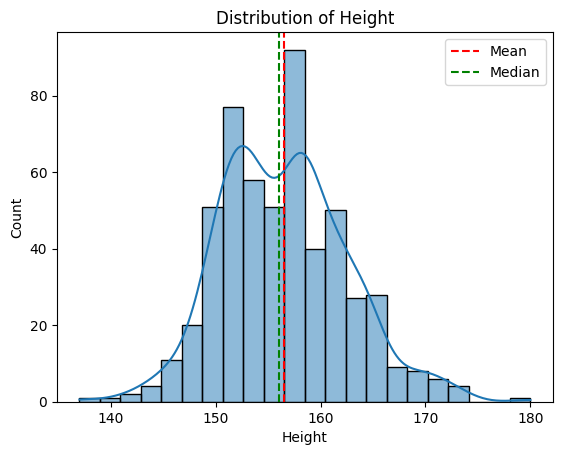

--------------------------------------------------


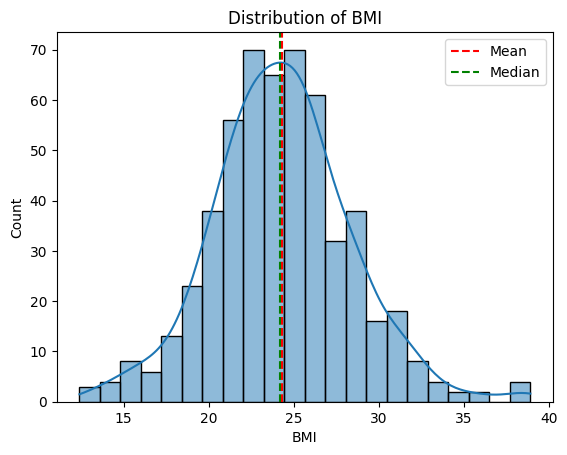

--------------------------------------------------


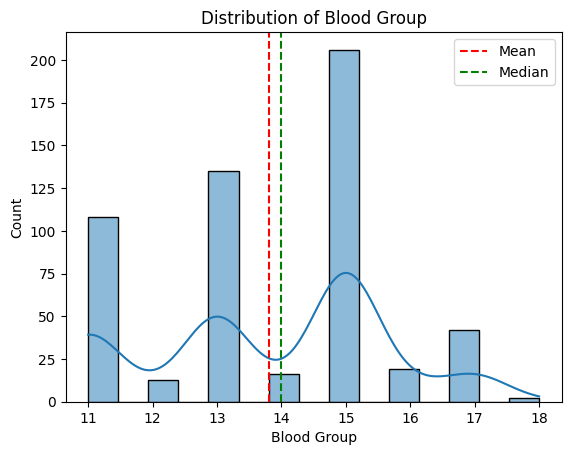

--------------------------------------------------


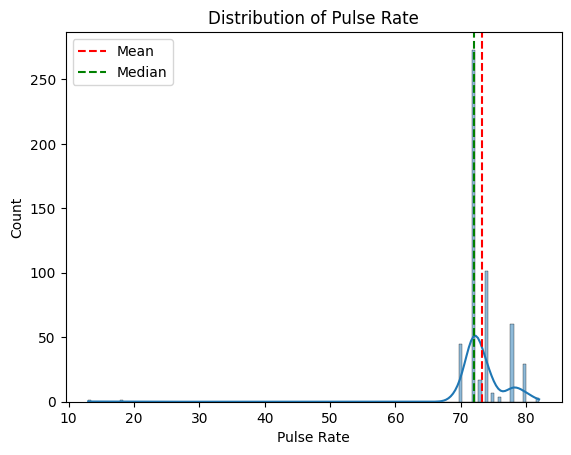

--------------------------------------------------


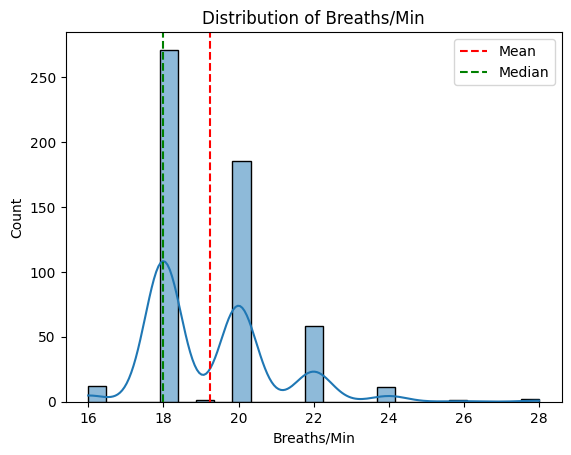

--------------------------------------------------


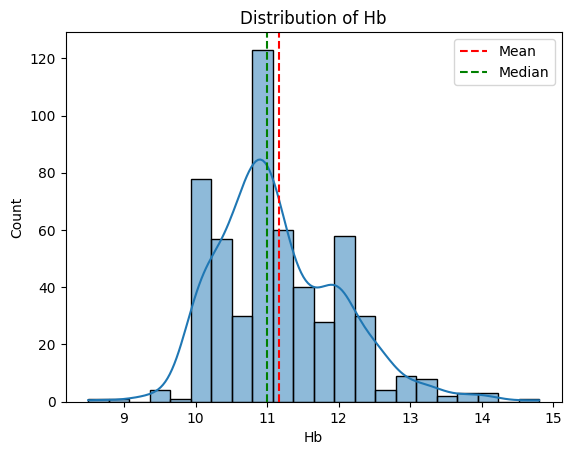

--------------------------------------------------


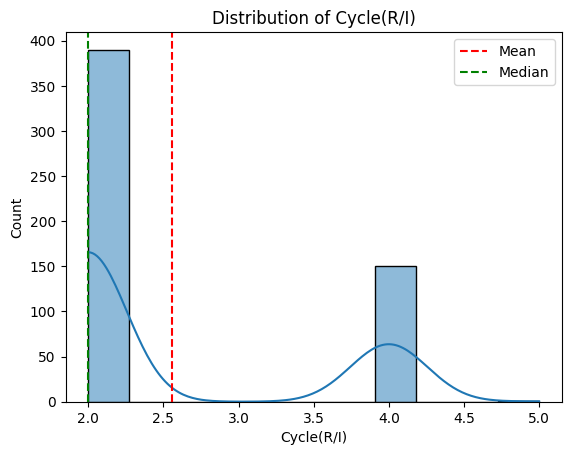

--------------------------------------------------


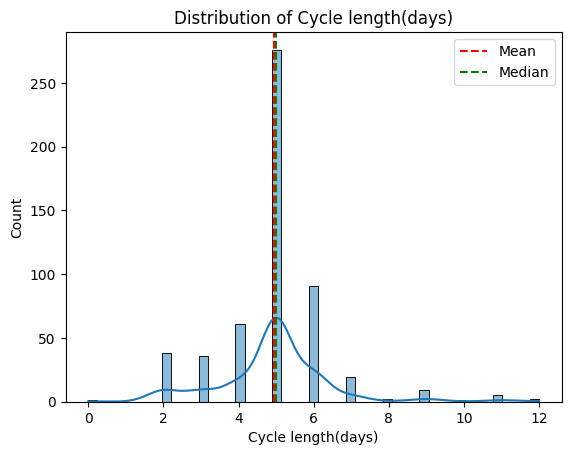

--------------------------------------------------


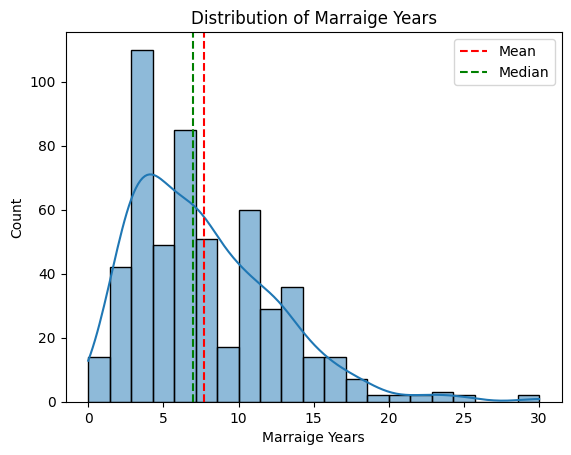

--------------------------------------------------


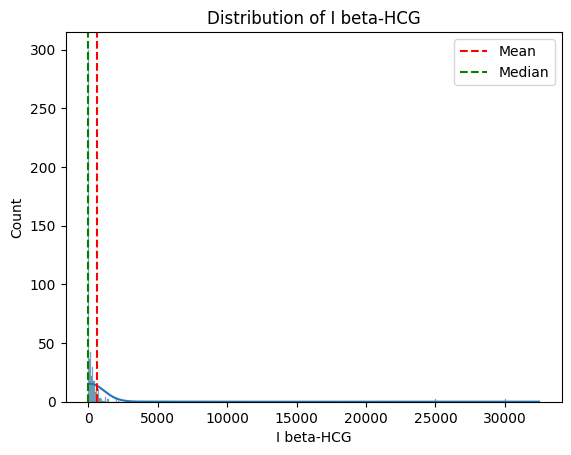

--------------------------------------------------


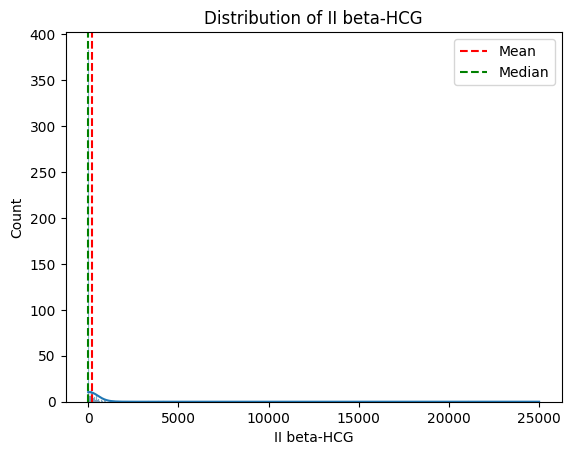

--------------------------------------------------


KeyboardInterrupt: 

In [52]:
#distribution plot for identifying distribution in the numerical columns
for col in numerical_columns:
  mean_value = df[col].mean()
  median_value = df[col].median()
  sns.histplot(df[col],kde=True)
  plt.axvline(mean_value,color='red',linestyle='--',label='Mean')
  plt.axvline(median_value,color='green',linestyle='--',label='Median')
  plt.title(f"Distribution of {col}")
  plt.xlabel(col)
  plt.legend()
  plt.show()
  print('-'*50)

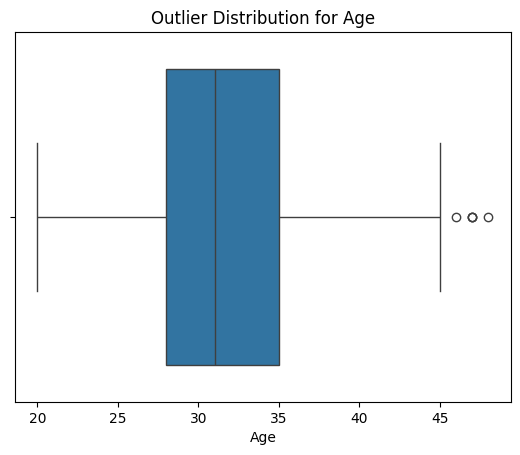

----------------------------------------------------------------------


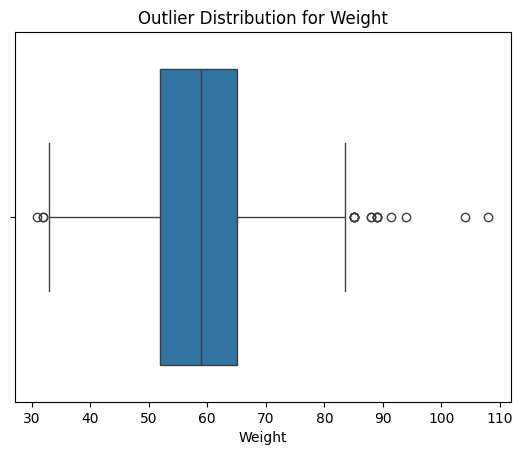

----------------------------------------------------------------------


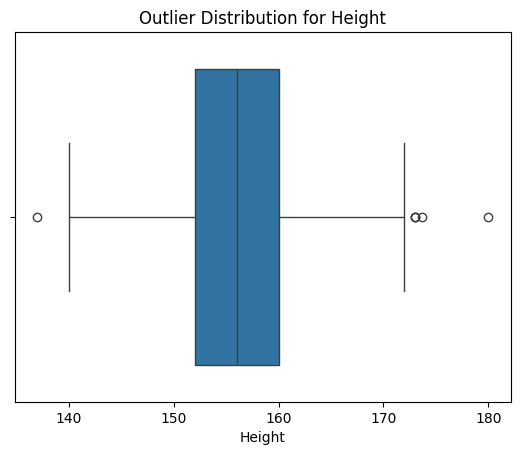

----------------------------------------------------------------------


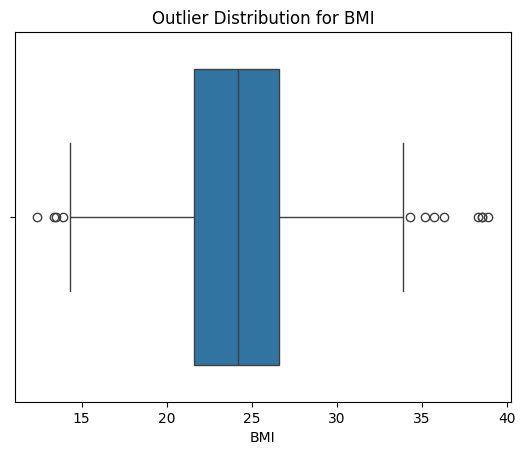

----------------------------------------------------------------------


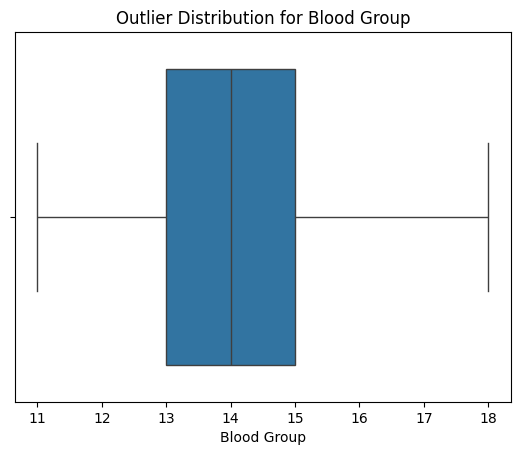

----------------------------------------------------------------------


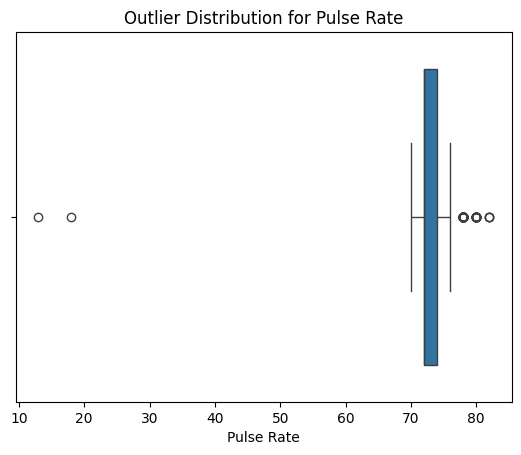

----------------------------------------------------------------------


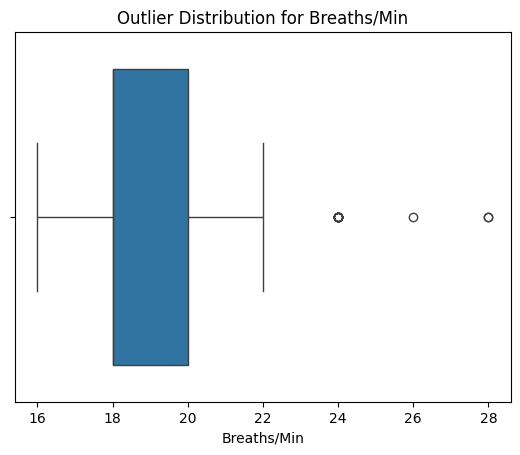

----------------------------------------------------------------------


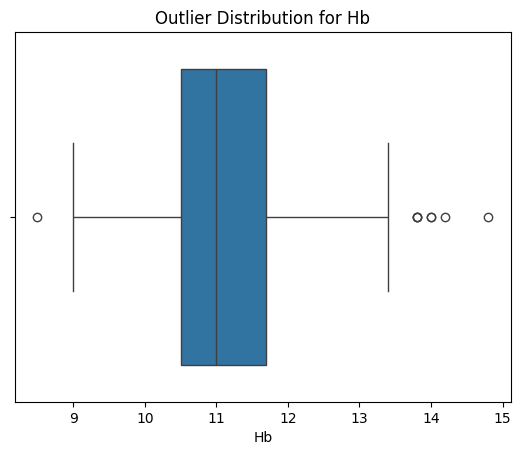

----------------------------------------------------------------------


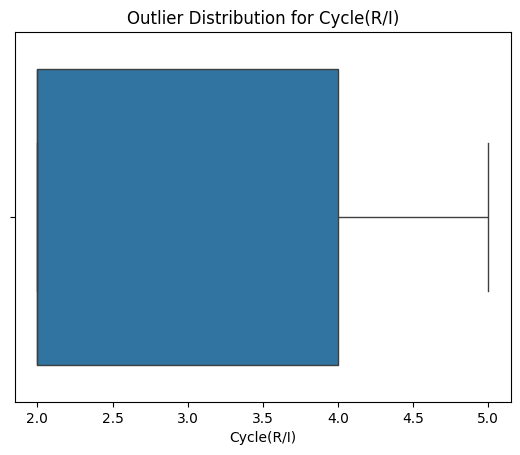

----------------------------------------------------------------------


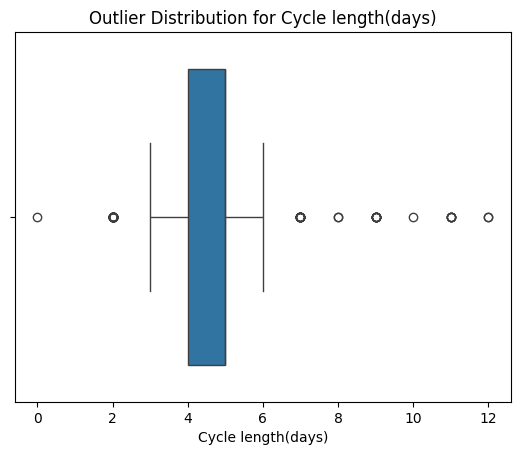

----------------------------------------------------------------------


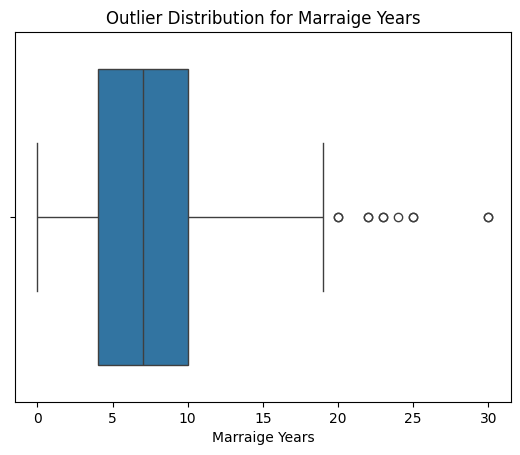

----------------------------------------------------------------------


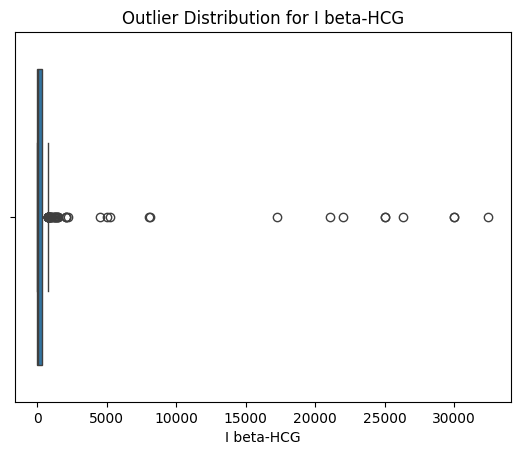

----------------------------------------------------------------------


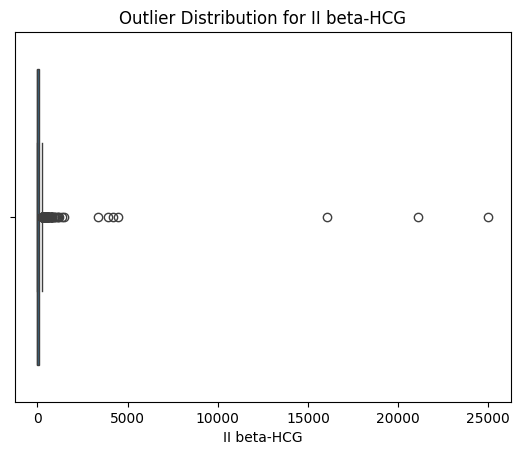

----------------------------------------------------------------------


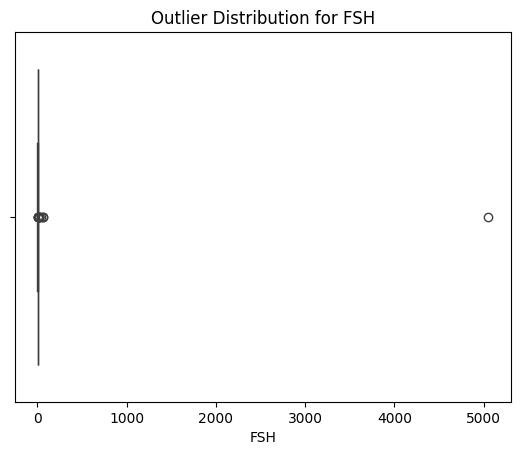

----------------------------------------------------------------------


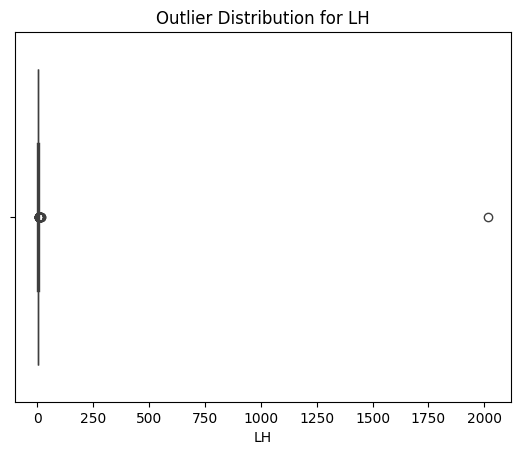

----------------------------------------------------------------------


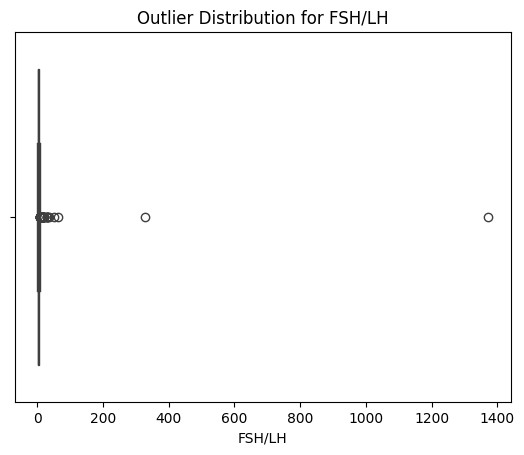

----------------------------------------------------------------------


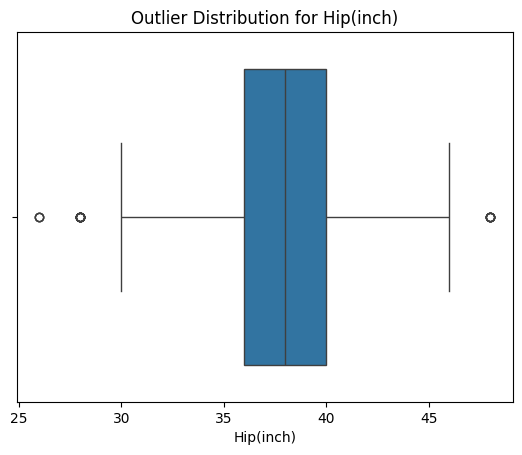

----------------------------------------------------------------------


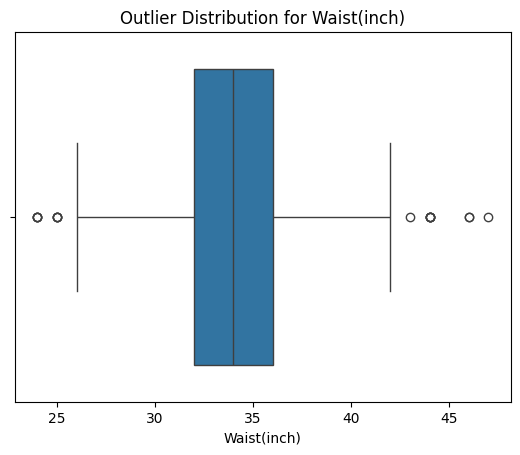

----------------------------------------------------------------------


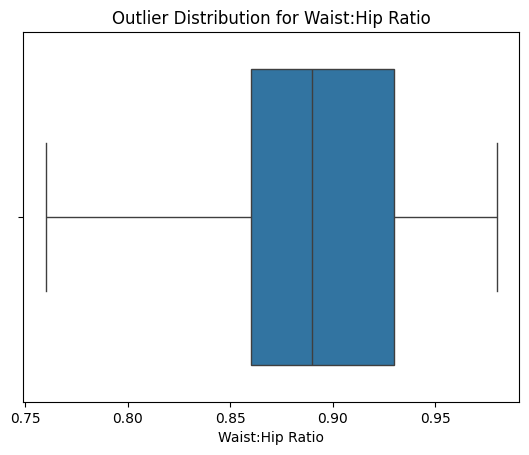

----------------------------------------------------------------------


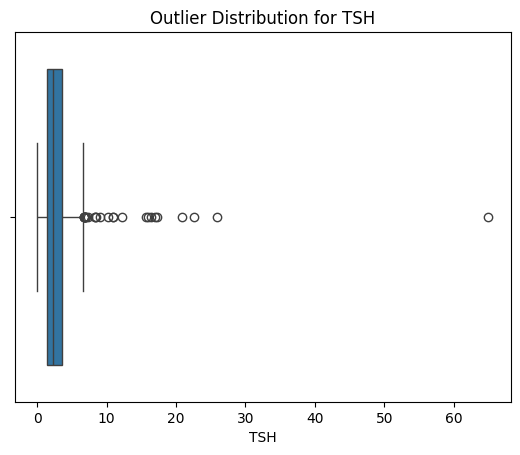

----------------------------------------------------------------------


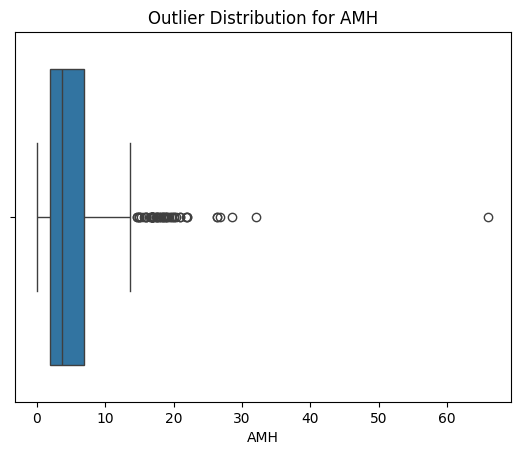

----------------------------------------------------------------------


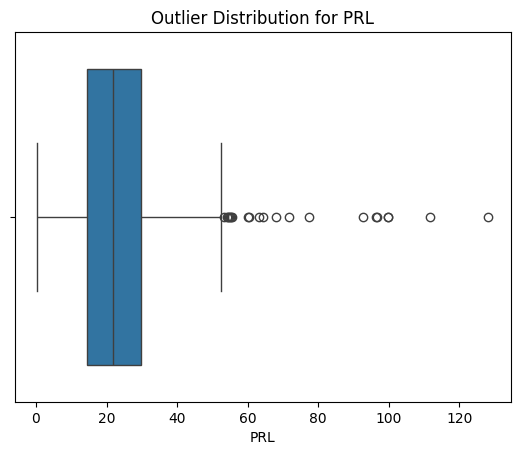

----------------------------------------------------------------------


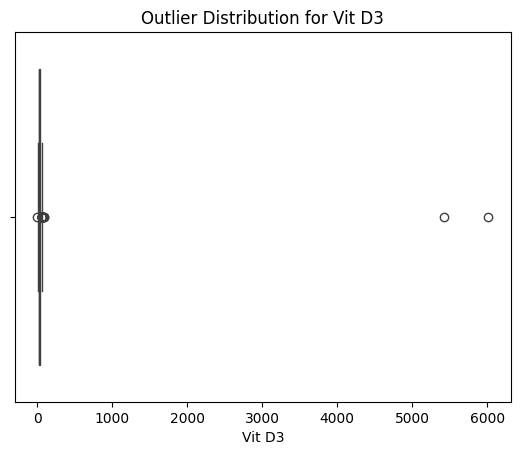

----------------------------------------------------------------------


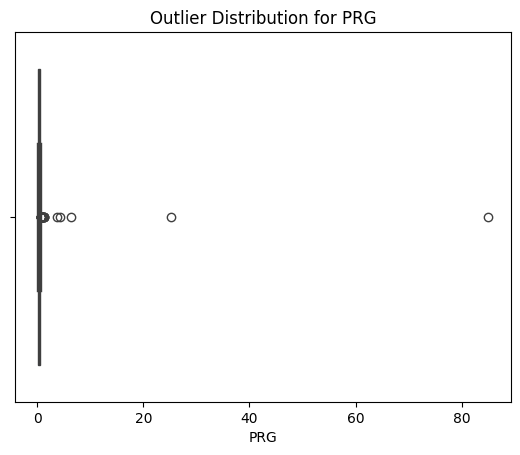

----------------------------------------------------------------------


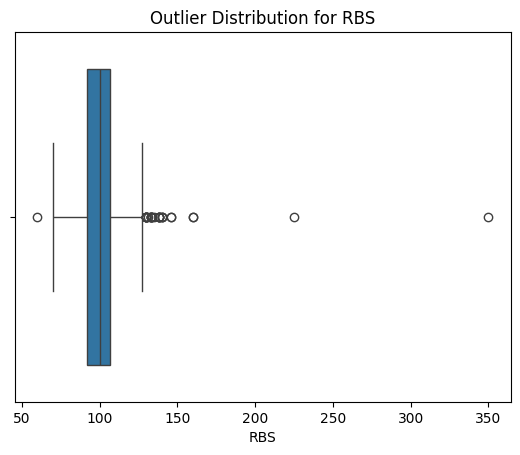

----------------------------------------------------------------------


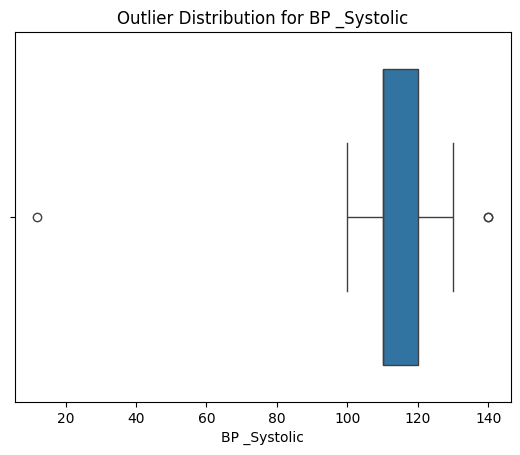

----------------------------------------------------------------------


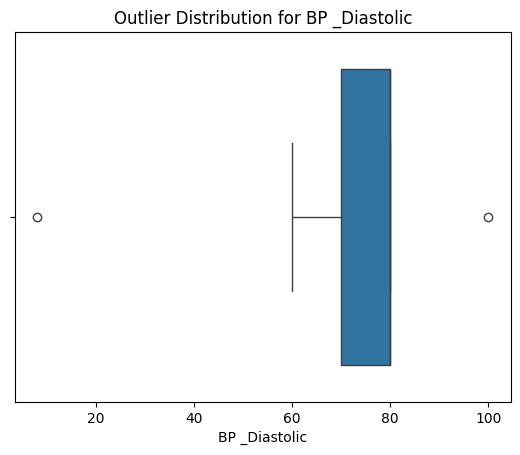

----------------------------------------------------------------------


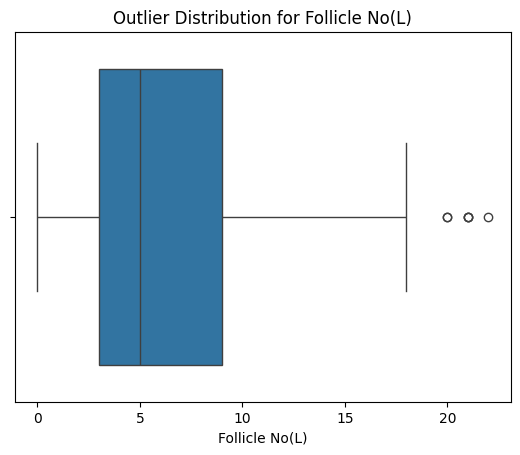

----------------------------------------------------------------------


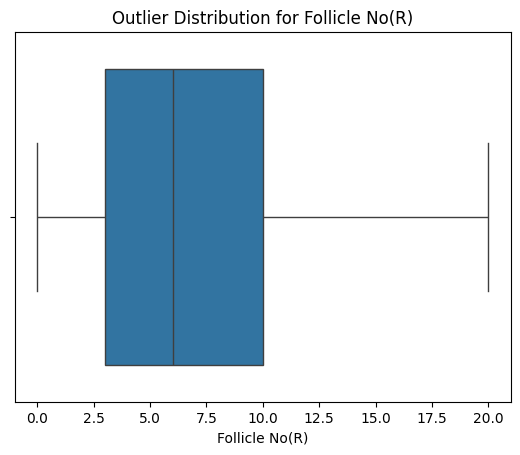

----------------------------------------------------------------------


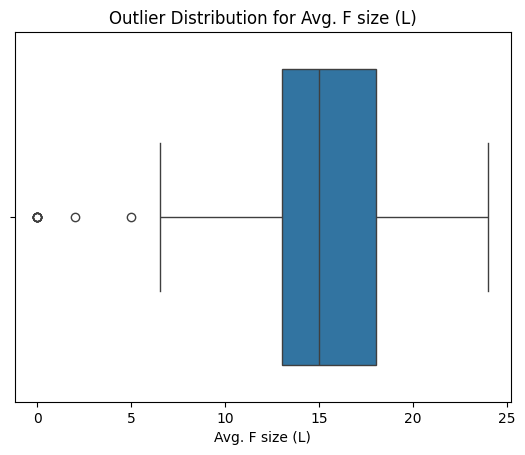

----------------------------------------------------------------------


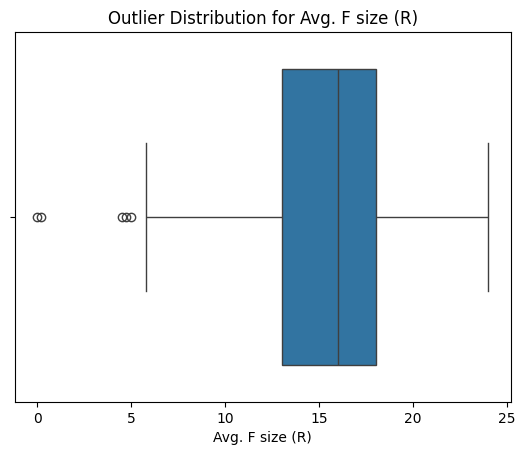

----------------------------------------------------------------------


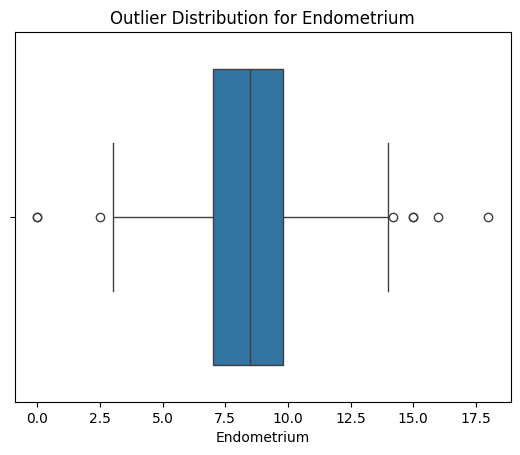

----------------------------------------------------------------------


In [53]:
#outlier distribution using box plot
for col in numerical_columns:
  sns.boxplot(x=df[col])
  plt.title(f'Outlier Distribution for {col}')
  plt.show()
  print('-'*70)

In [54]:
outlier_columns = ['Age','Weight','Height','BMI','Cycle length(days)','Marraige Years','Hip(inch)','Waist(inch)','TSH','AMH','PRL','RBS']

**Univariate Analysis for Categorical Columns**

In [55]:
categorical_columns

['PCOS',
 'Pregnant',
 'No. of abortions',
 'Weight Gain',
 'Hair Growth',
 'Skin Darkening',
 'Hair Loss',
 'Pimples',
 'Fast Food',
 'Regular Exercise']

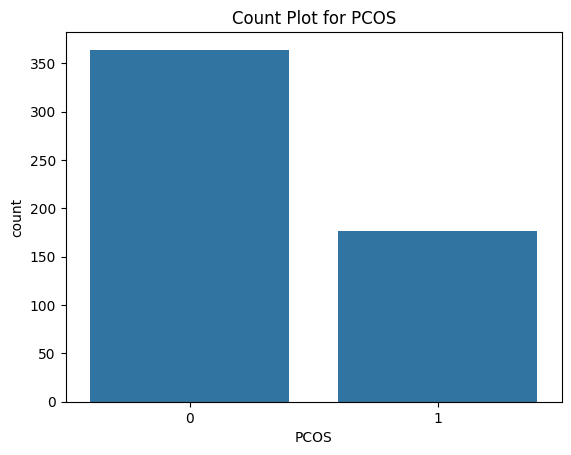

----------------------------------------------------------------------


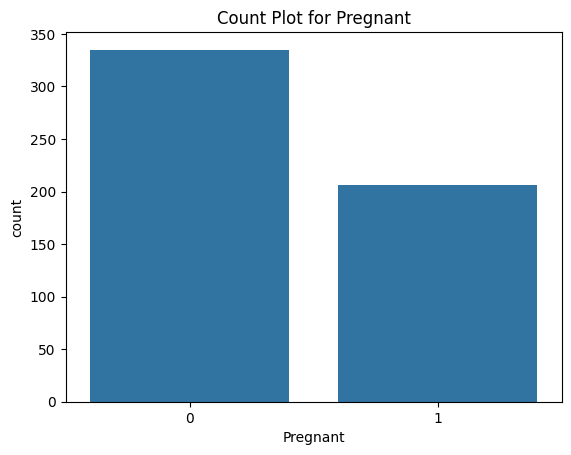

----------------------------------------------------------------------


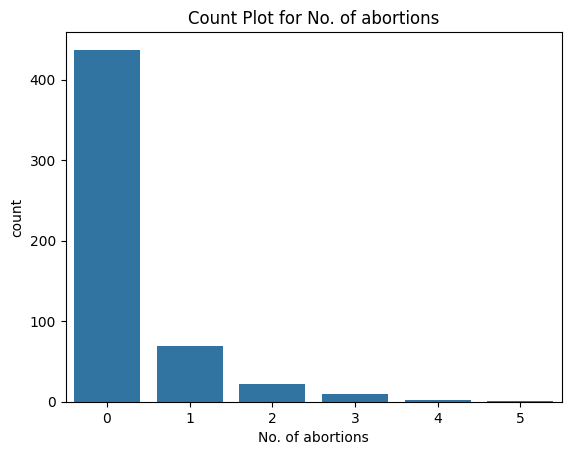

----------------------------------------------------------------------


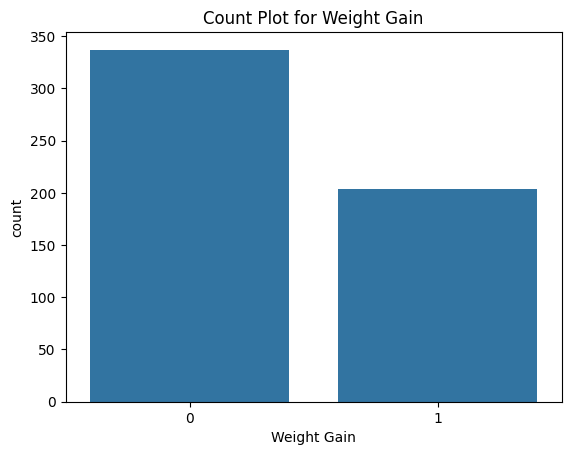

----------------------------------------------------------------------


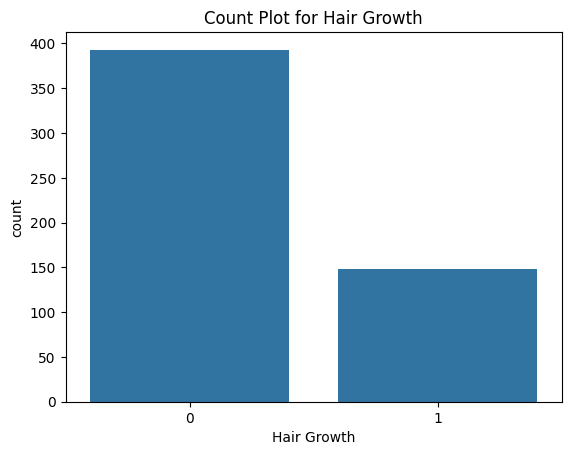

----------------------------------------------------------------------


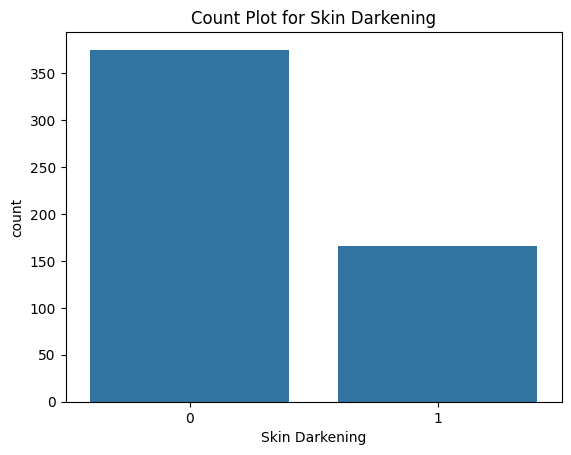

----------------------------------------------------------------------


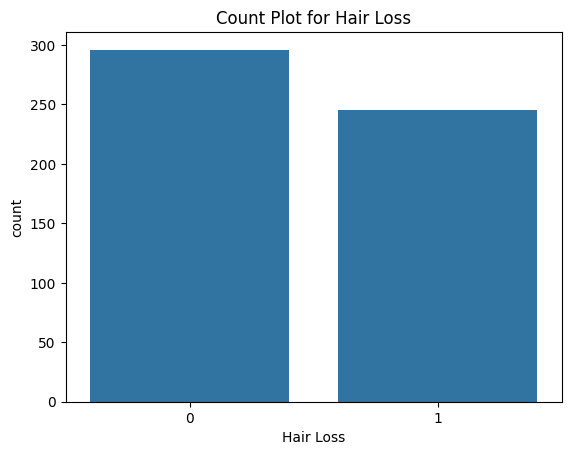

----------------------------------------------------------------------


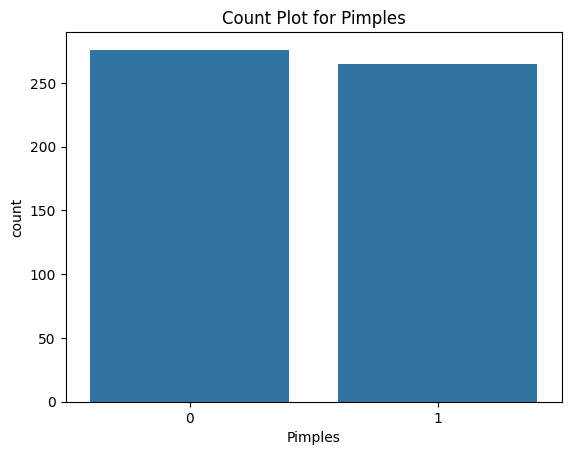

----------------------------------------------------------------------


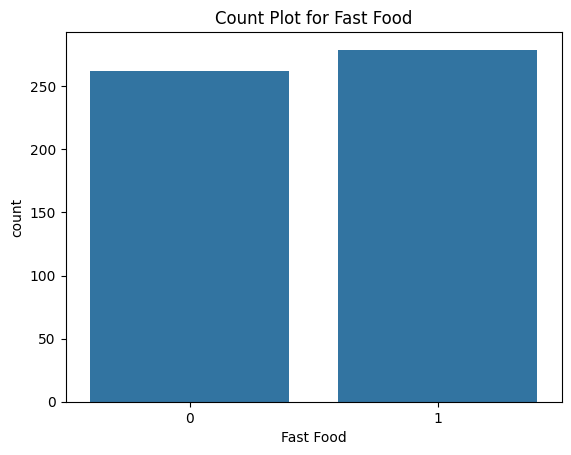

----------------------------------------------------------------------


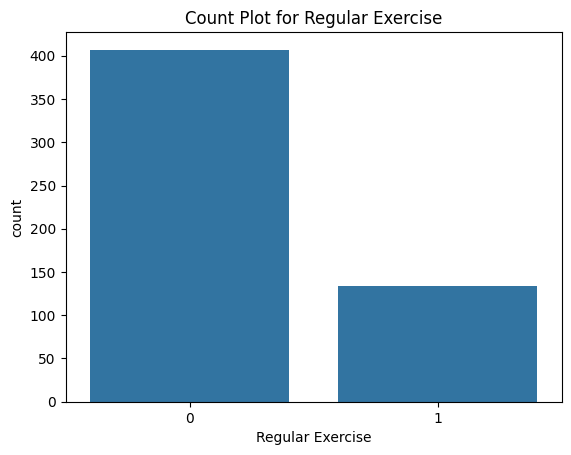

----------------------------------------------------------------------


In [56]:
#using countplot method of seaborn for identifying the distribution of each category for each column
for col in categorical_columns:
  sns.countplot(x=df[col])
  plt.xticks(df[col].value_counts().index)
  plt.title(f"Count Plot for {col}")
  plt.show()
  print('-'*70)

In [57]:
df.head()

PCOS  Age  Weight  Height   BMI  Blood Group  Pulse Rate  Breaths/Min  \
0    0   28    44.6   152.0  19.3           15          78           22   
1    0   36    65.0   161.5  24.9           15          74           20   
2    1   33    68.8   165.0  25.3           11          72           18   
3    0   37    65.0   148.0  29.7           13          72           20   
4    0   25    52.0   161.0  20.1           11          72           18   

      Hb  Cycle(R/I)  Cycle length(days)  Marraige Years Pregnant  \
0  10.48           2                   5             7.0        0   
1  11.70           2                   5            11.0        1   
2  11.80           2                   5            10.0        1   
3  12.00           2                   5             4.0        0   
4  10.00           2                   5             1.0        1   

  No. of abortions  I beta-HCG  II beta-HCG   FSH    LH  FSH/LH  Hip(inch)  \
0                0        1.99         1.99  7.95  3.68    2.16         36   
1                0       60.80         1.99  6.73  1.09    6.17         38   
2                0      494.08       494.08  5.54  0.88    6.30         40   
3                0        1.99         1.99  8.06  2.36    3.42         42   
4                0      801.45       801.45  3.98  0.90    4.42         37   

   Waist(inch)  Waist:Hip Ratio    TSH   AMH    PRL  Vit D3   PRG   RBS  \
0           30             0.83   0.68  2.07  45.16    17.1  0.57  92.0   
1           32             0.84   3.16  1.53  20.09    61.3  0.97  92.0   
2           36             0.90   2.54  6.63  10.52    49.7  0.36  84.0   
3           36             0.86  16.41  1.22  36.90    33.4  0.36  76.0   
4           30             0.81   3.57  2.26  30.09    43.8  0.38  84.0   

  Weight Gain Hair Growth Skin Darkening Hair Loss Pimples Fast Food  \
0           0           0              0         0       0         1   
1           0           0              0         0       0         0   
2           0           0              0         1       1         1   
3           0           0              0         0       0         0   
4           0           0              0         1       0         0   

  Regular Exercise  BP _Systolic  BP _Diastolic  Follicle No(L)  \
0                0           110             80               3   
1                0           120             70               3   
2                0           120             80              13   
3                0           120             70               2   
4                0           120             80               3   

   Follicle No(R)  Avg. F size (L)  Avg. F size (R)  Endometrium  
0               3             18.0             18.0          8.5  
1               5             15.0             14.0          3.7  
2              15             18.0             20.0         10.0  
3               2             15.0             14.0          7.5  
4               4             16.0             14.0          7.0

**Bivariate Analysis using Heatmap**

In [58]:
df.corr()

PCOS       Age    Weight    Height       BMI  \
PCOS                1.000000 -0.168513  0.211938  0.068254  0.199697   
Age                -0.168513  1.000000 -0.029734 -0.119819  0.021372   
Weight              0.211938 -0.029734  1.000000  0.420098  0.901688   
Height              0.068254 -0.119819  0.420098  1.000000 -0.006845   
BMI                 0.199697  0.021372  0.901688 -0.006845  1.000000   
Blood Group         0.036433 -0.010954  0.072682  0.040825  0.061328   
Pulse Rate          0.091821  0.045831  0.019983 -0.074339  0.050507   
Breaths/Min         0.036928  0.087382  0.043614 -0.029459  0.061579   
Hb                  0.087170 -0.021558  0.009594  0.024378  0.003832   
Cycle(R/I)          0.401644 -0.085943  0.200758 -0.017336  0.232703   
Cycle length(days) -0.178480  0.055918 -0.002308  0.009536 -0.006598   
Marraige Years     -0.112681  0.661641  0.043803 -0.066695  0.083625   
Pregnant           -0.027565 -0.044165 -0.051048  0.046365 -0.073816   
No. of abortions   -0.057158  0.220794  0.093540 -0.025648  0.109930   
I beta-HCG         -0.027617  0.008148  0.015994  0.062301 -0.009893   
II beta-HCG         0.013152  0.042629 -0.000917  0.036364 -0.016027   
FSH                -0.030319 -0.017794 -0.025750  0.030941 -0.040689   
LH                  0.063879  0.000467 -0.029864 -0.045498 -0.013274   
FSH/LH             -0.018334  0.012462 -0.004843  0.022021 -0.012077   
Hip(inch)           0.162297 -0.002784  0.633983  0.216173  0.596885   
Waist(inch)         0.164598  0.035779  0.639635  0.209553  0.607787   
Waist:Hip Ratio     0.012145  0.066029  0.014469 -0.014199  0.025848   
TSH                -0.010140  0.016740  0.068482  0.013504  0.071304   
AMH                 0.263745 -0.179471  0.031047 -0.045185  0.054263   
PRL                 0.005143 -0.048757 -0.049007 -0.016096 -0.047314   
Vit D3              0.085494  0.004388  0.008164 -0.034934  0.027015   
PRG                -0.043834 -0.021909  0.069731  0.049741  0.050022   
RBS                 0.048922  0.097008  0.114277  0.050399  0.093503   
Weight Gain         0.441047 -0.028826  0.419333  0.018534  0.455304   
Hair Growth         0.464667 -0.073434  0.188240  0.048910  0.181744   
Skin Darkening      0.475733 -0.103421  0.180186  0.074731  0.158725   
Hair Loss           0.172879 -0.082784  0.074381 -0.013533  0.084365   
Pimples             0.286077 -0.032921  0.063983  0.061129  0.045535   
Fast Food           0.376183 -0.039108  0.160774  0.032839  0.157744   
Regular Exercise    0.065337 -0.025911 -0.068236  0.012943 -0.080660   
BP _Systolic        0.007942  0.073587  0.027608 -0.067959  0.069737   
BP _Diastolic       0.038032  0.066788  0.131402  0.011116  0.140062   
Follicle No(L)      0.603346 -0.110793  0.173751  0.106189  0.143110   
Follicle No(R)      0.648327 -0.159395  0.124290  0.075358  0.104425   
Avg. F size (L)     0.132992 -0.016352 -0.021368 -0.026705 -0.011736   
Avg. F size (R)     0.097690 -0.079250 -0.073207  0.059426 -0.111427   
Endometrium         0.106648 -0.104238 -0.010100 -0.054035  0.009327   

                    Blood Group  Pulse Rate  Breaths/Min        Hb  \
PCOS                   0.036433    0.091821     0.036928  0.087170   
Age                   -0.010954    0.045831     0.087382 -0.021558   
Weight                 0.072682    0.019983     0.043614  0.009594   
Height                 0.040825   -0.074339    -0.029459  0.024378   
BMI                    0.061328    0.050507     0.061579  0.003832   
Blood Group            1.000000    0.047572    -0.023766 -0.001759   
Pulse Rate             0.047572    1.000000     0.303804 -0.052048   
Breaths/Min           -0.023766    0.303804     1.000000 -0.040487   
Hb                    -0.001759   -0.052048    -0.040487  1.000000   
Cycle(R/I)             0.123724    0.101006     0.018324  0.036683   
Cycle length(days)    -0.006290    0.006423     0.005004 -0.051927   
Marraige Years        -0.001794    0.038781     0.077895  0.007057   
Pregnant         

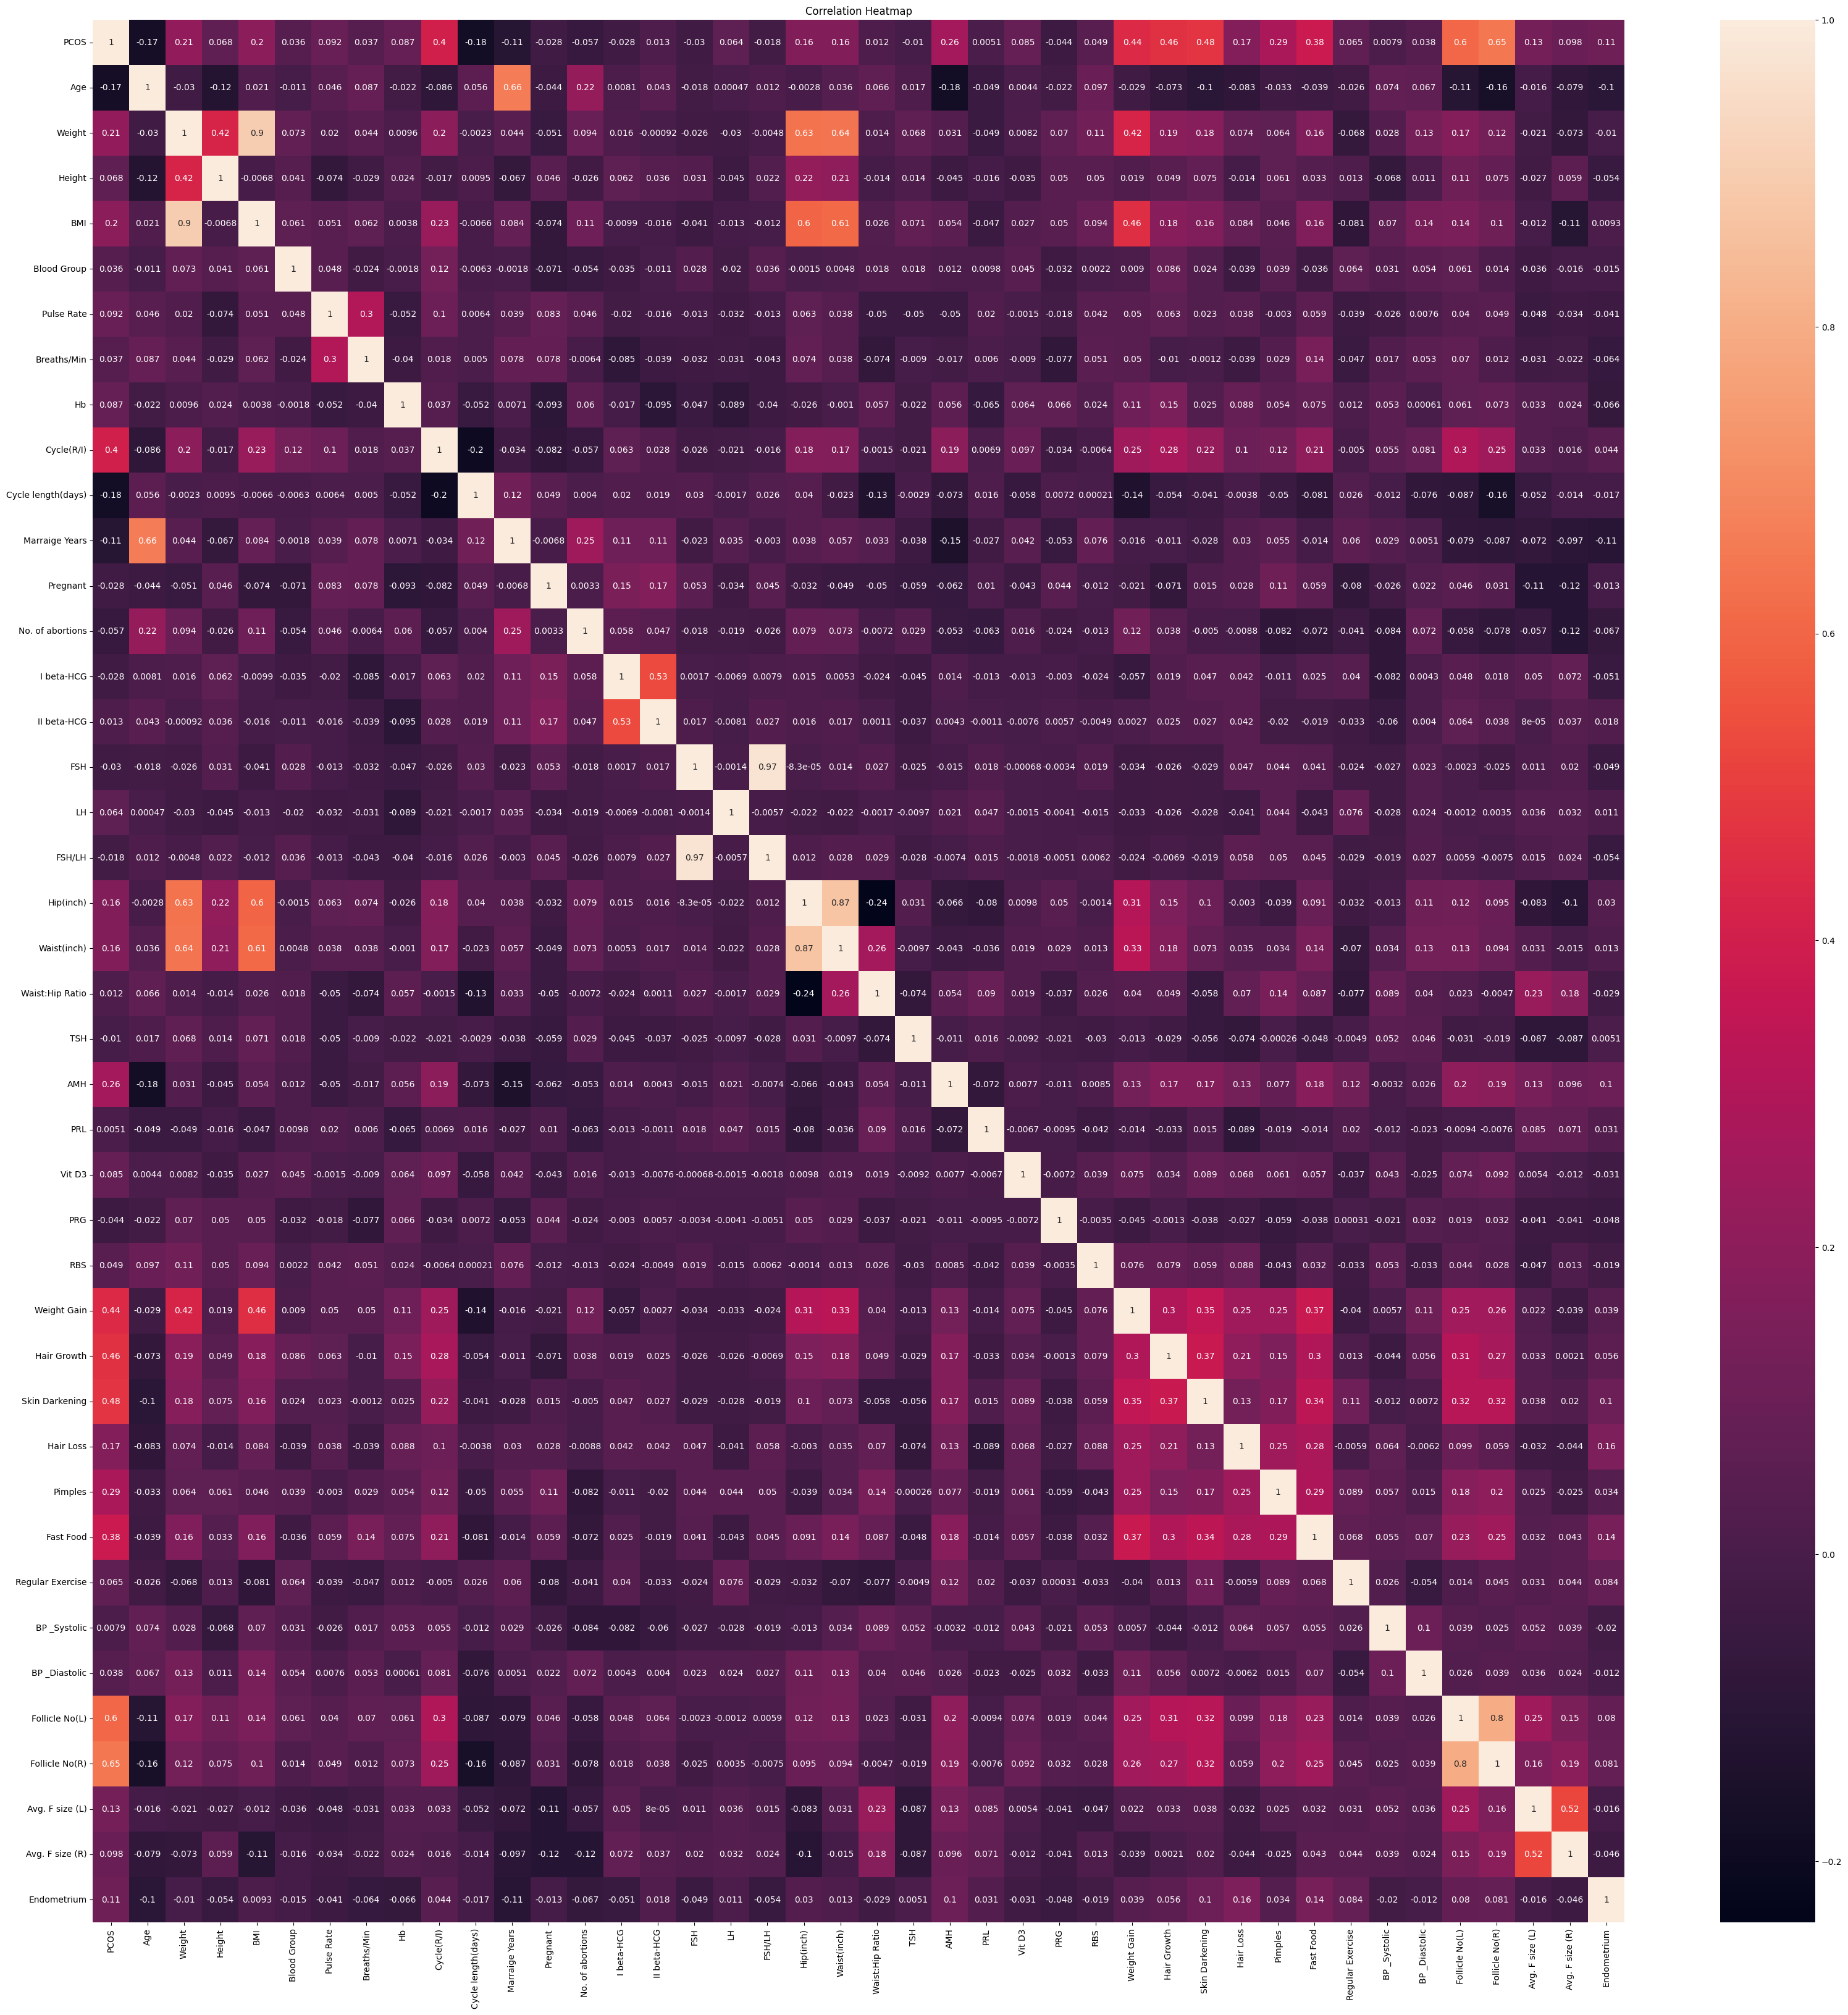

In [59]:
plt.figure(figsize=(40,40))
sns.heatmap(df.corr(),annot=True)
plt.title('Correlation Heatmap')
plt.show()

In [60]:
df.columns

Index(['PCOS', 'Age', 'Weight', 'Height', 'BMI', 'Blood Group', 'Pulse Rate',
       'Breaths/Min', 'Hb', 'Cycle(R/I)', 'Cycle length(days)',
       'Marraige Years', 'Pregnant', 'No. of abortions', 'I beta-HCG',
       'II beta-HCG', 'FSH', 'LH', 'FSH/LH', 'Hip(inch)', 'Waist(inch)',
       'Waist:Hip Ratio', 'TSH', 'AMH', 'PRL', 'Vit D3', 'PRG', 'RBS',
       'Weight Gain', 'Hair Growth', 'Skin Darkening', 'Hair Loss', 'Pimples',
       'Fast Food', 'Regular Exercise', 'BP _Systolic', 'BP _Diastolic',
       'Follicle No(L)', 'Follicle No(R)', 'Avg. F size (L)',
       'Avg. F size (R)', 'Endometrium'],
      dtype='object')

In [61]:
correlated_columns = ['Cycle length(days)','Waist:Hip Ratio', 'Marraige Years','Hip(inch)','Waist(inch)']

In [62]:
for col in correlated_columns:
  if col in categorical_columns:
    print(f'Column: {col}, Categorical Column')
  elif col in numerical_columns:
    print(f'Column: {col}, Numerical Column')

Column: Cycle length(days), Numerical Column
Column: Waist:Hip Ratio, Numerical Column
Column: Marraige Years, Numerical Column
Column: Hip(inch), Numerical Column
Column: Waist(inch), Numerical Column


In [63]:
#replacing outliers in outlier_column with respective median values
for col in outlier_columns:
  IQR  = df[col].quantile(0.75) - df[col].quantile(0.25)
  median = df[col].median()
  lower_bound = df[col].quantile(0.25) - (1.5*IQR)
  upper_bound = df[col].quantile(0.75) + (1.5*IQR)
  df[col] = np.where(df[col] > upper_bound,median,df[col])
  df[col] = np.where(df[col] < lower_bound,median,df[col])

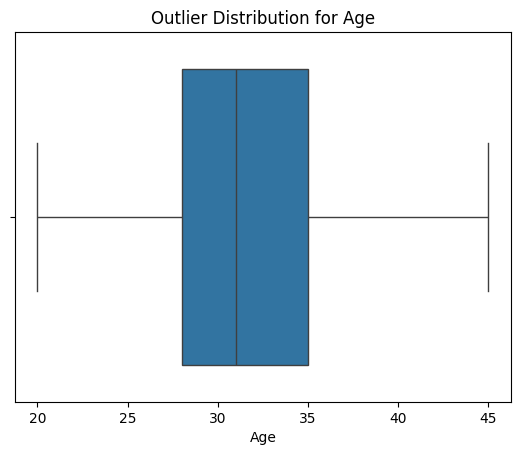

----------------------------------------------------------------------


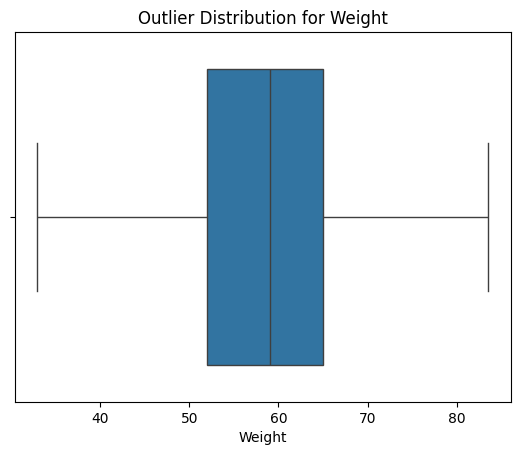

----------------------------------------------------------------------


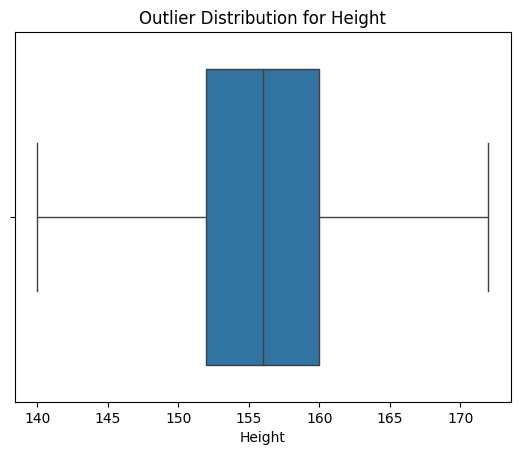

----------------------------------------------------------------------


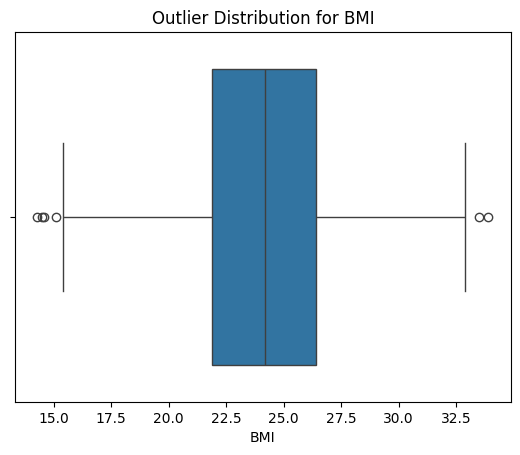

----------------------------------------------------------------------


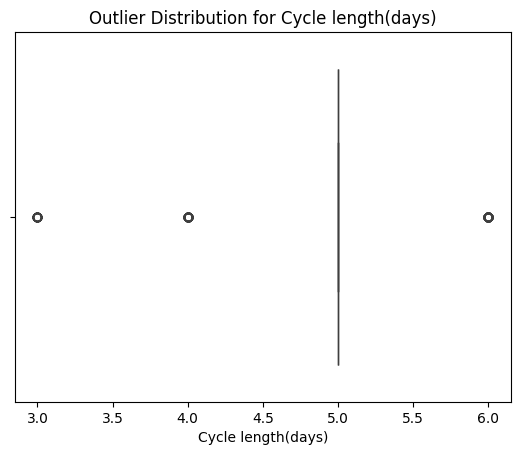

----------------------------------------------------------------------


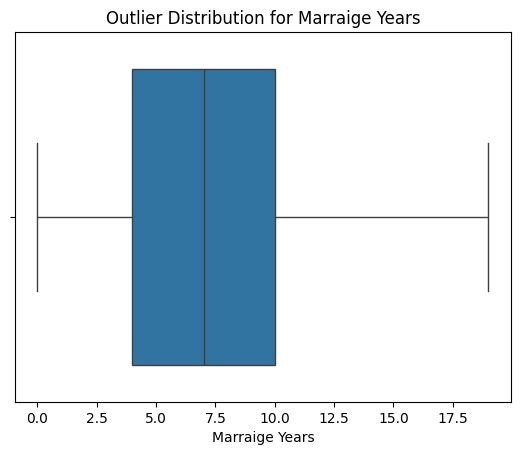

----------------------------------------------------------------------


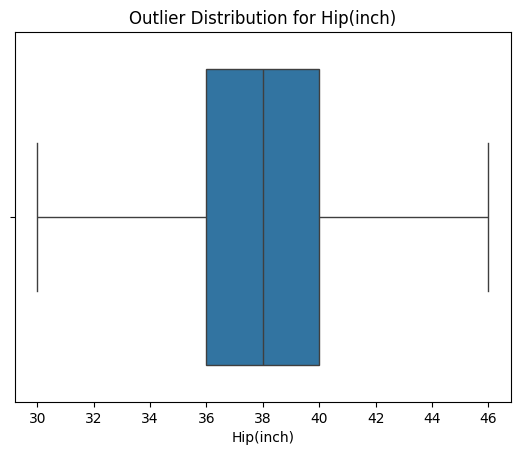

----------------------------------------------------------------------


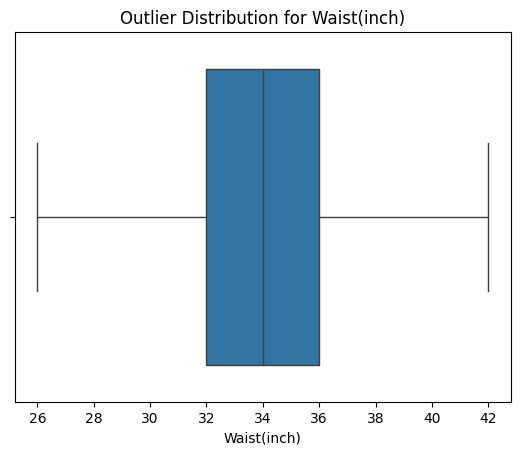

----------------------------------------------------------------------


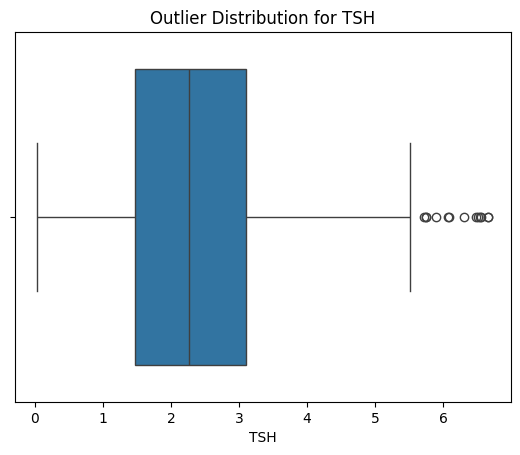

----------------------------------------------------------------------


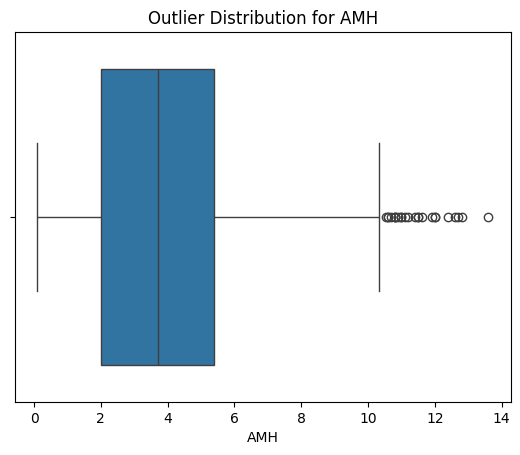

----------------------------------------------------------------------


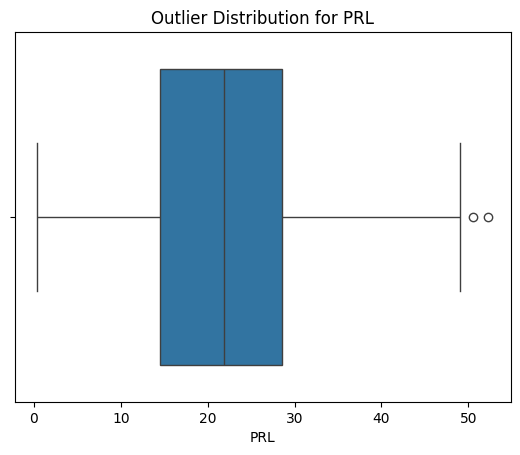

----------------------------------------------------------------------


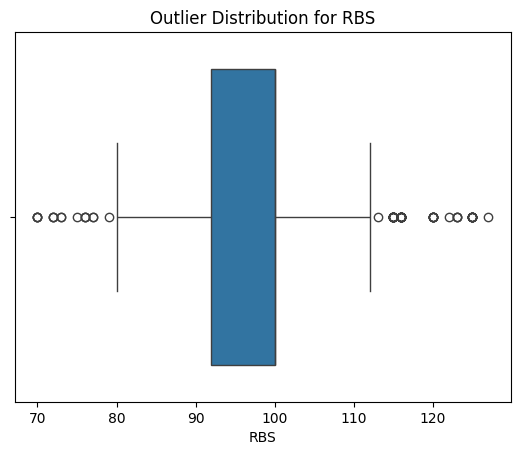

----------------------------------------------------------------------


In [64]:
#boxplot for identifying outliers for outlier columns
for col in outlier_columns:
  sns.boxplot(x=df[col])
  plt.title(f'Outlier Distribution for {col}')
  plt.show()
  print('-'*70)

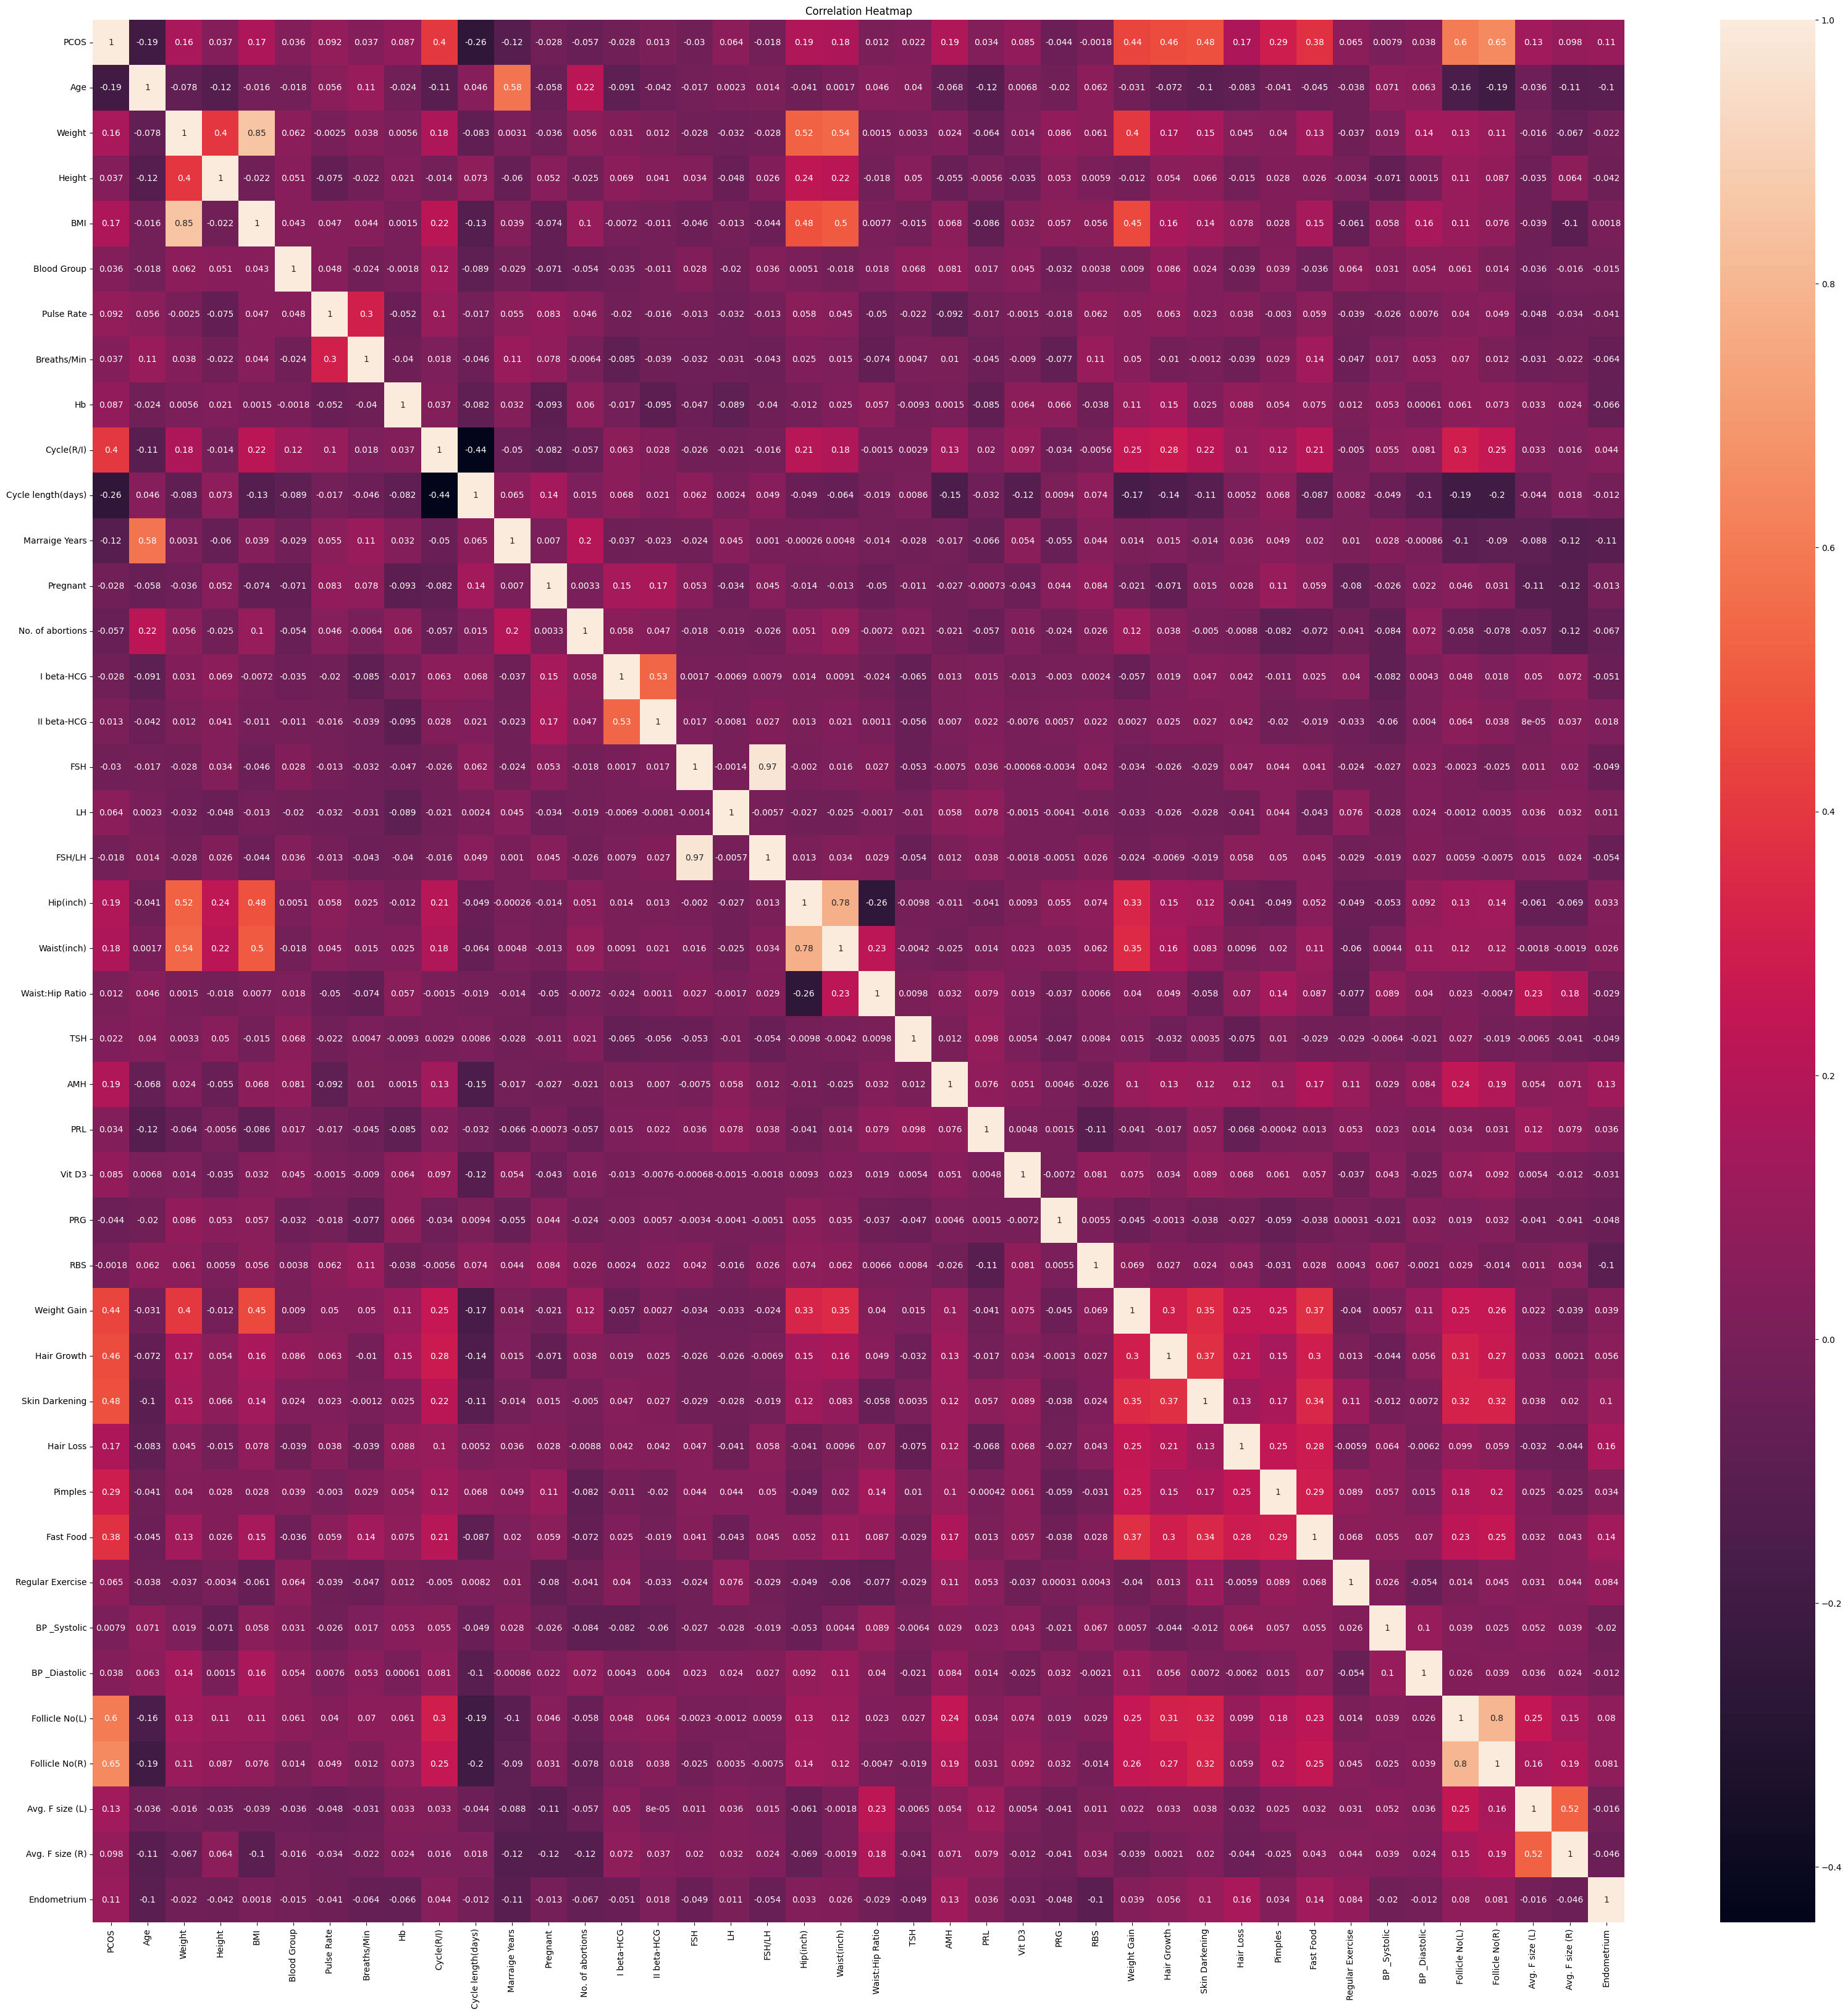

In [65]:
#identifying correlation after replacing outliers with median values
plt.figure(figsize=(40,40))
sns.heatmap(df.corr(),annot=True)
plt.title('Correlation Heatmap')
plt.show()

In [66]:
correlated_columns

['Cycle length(days)',
 'Waist:Hip Ratio',
 'Marraige Years',
 'Hip(inch)',
 'Waist(inch)']

In [67]:
df = df.drop(correlated_columns,axis=1)

In [68]:
df.head()

PCOS   Age  Weight  Height   BMI  Blood Group  Pulse Rate  Breaths/Min  \
0    0  28.0    44.6   152.0  19.3           15          78           22   
1    0  36.0    65.0   161.5  24.9           15          74           20   
2    1  33.0    68.8   165.0  25.3           11          72           18   
3    0  37.0    65.0   148.0  29.7           13          72           20   
4    0  25.0    52.0   161.0  20.1           11          72           18   

      Hb  Cycle(R/I) Pregnant No. of abortions  I beta-HCG  II beta-HCG   FSH  \
0  10.48           2        0                0        1.99         1.99  7.95   
1  11.70           2        1                0       60.80         1.99  6.73   
2  11.80           2        1                0      494.08       494.08  5.54   
3  12.00           2        0                0        1.99         1.99  8.06   
4  10.00           2        1                0      801.45       801.45  3.98   

     LH  FSH/LH   TSH   AMH    PRL  Vit D3   PRG   RBS Weight Gain  \
0  3.68    2.16  0.68  2.07  45.16    17.1  0.57  92.0           0   
1  1.09    6.17  3.16  1.53  20.09    61.3  0.97  92.0           0   
2  0.88    6.30  2.54  6.63  10.52    49.7  0.36  84.0           0   
3  2.36    3.42  2.26  1.22  36.90    33.4  0.36  76.0           0   
4  0.90    4.42  3.57  2.26  30.09    43.8  0.38  84.0           0   

  Hair Growth Skin Darkening Hair Loss Pimples Fast Food Regular Exercise  \
0           0              0         0       0         1                0   
1           0              0         0       0         0                0   
2           0              0         1       1         1                0   
3           0              0         0       0         0                0   
4           0              0         1       0         0                0   

   BP _Systolic  BP _Diastolic  Follicle No(L)  Follicle No(R)  \
0           110             80               3               3   
1           120             70               3               5   
2           120             80              13              15   
3           120             70               2               2   
4           120             80               3               4   

   Avg. F size (L)  Avg. F size (R)  Endometrium  
0             18.0             18.0          8.5  
1             15.0             14.0          3.7  
2             18.0             20.0         10.0  
3             15.0             14.0          7.5  
4             16.0             14.0          7.0

**Training the Model**

In [69]:
features = df.drop('PCOS',axis=1)
target = df['PCOS']

In [70]:
features.head()

Age  Weight  Height   BMI  Blood Group  Pulse Rate  Breaths/Min     Hb  \
0  28.0    44.6   152.0  19.3           15          78           22  10.48   
1  36.0    65.0   161.5  24.9           15          74           20  11.70   
2  33.0    68.8   165.0  25.3           11          72           18  11.80   
3  37.0    65.0   148.0  29.7           13          72           20  12.00   
4  25.0    52.0   161.0  20.1           11          72           18  10.00   

   Cycle(R/I) Pregnant No. of abortions  I beta-HCG  II beta-HCG   FSH    LH  \
0           2        0                0        1.99         1.99  7.95  3.68   
1           2        1                0       60.80         1.99  6.73  1.09   
2           2        1                0      494.08       494.08  5.54  0.88   
3           2        0                0        1.99         1.99  8.06  2.36   
4           2        1                0      801.45       801.45  3.98  0.90   

   FSH/LH   TSH   AMH    PRL  Vit D3   PRG   RBS Weight Gain Hair Growth  \
0    2.16  0.68  2.07  45.16    17.1  0.57  92.0           0           0   
1    6.17  3.16  1.53  20.09    61.3  0.97  92.0           0           0   
2    6.30  2.54  6.63  10.52    49.7  0.36  84.0           0           0   
3    3.42  2.26  1.22  36.90    33.4  0.36  76.0           0           0   
4    4.42  3.57  2.26  30.09    43.8  0.38  84.0           0           0   

  Skin Darkening Hair Loss Pimples Fast Food Regular Exercise  BP _Systolic  \
0              0         0       0         1                0           110   
1              0         0       0         0                0           120   
2              0         1       1         1                0           120   
3              0         0       0         0                0           120   
4              0         1       0         0                0           120   

   BP _Diastolic  Follicle No(L)  Follicle No(R)  Avg. F size (L)  \
0             80               3               3             18.0   
1             70               3               5             15.0   
2             80              13              15             18.0   
3             70               2               2             15.0   
4             80               3               4             16.0   

   Avg. F size (R)  Endometrium  
0             18.0          8.5  
1             14.0          3.7  
2             20.0         10.0  
3             14.0          7.5  
4             14.0          7.0

In [71]:
target.head()

0    0
1    0
2    1
3    0
4    0
Name: PCOS, dtype: category
Categories (2, int64): [0, 1]

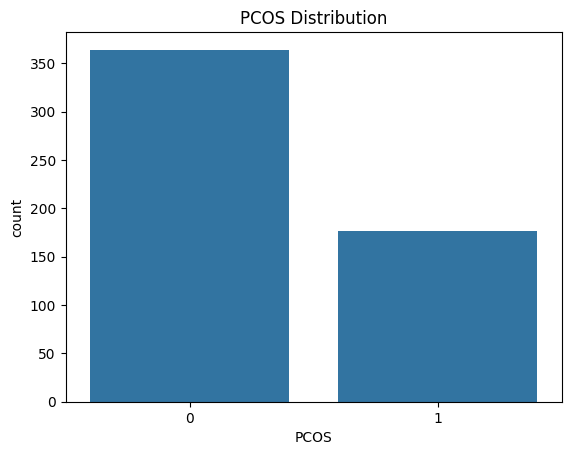

In [72]:
sns.countplot(x=target)
plt.title(f"PCOS Distribution")
plt.show()

In [73]:
target.value_counts()

PCOS
0    364
1    177
Name: count, dtype: int64

**Features Selection**

In [74]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(features,target,test_size=0.2,random_state=2333)

In [75]:
numerical_columns = x_train.select_dtypes(include=['int64','float64']).columns
categorical_columns = x_train.select_dtypes(include=['category']).columns

In [76]:
len(numerical_columns)

27

In [77]:
numerical_columns

Index(['Age', 'Weight', 'Height', 'BMI', 'Blood Group', 'Pulse Rate',
       'Breaths/Min', 'Hb', 'Cycle(R/I)', 'I beta-HCG', 'II beta-HCG', 'FSH',
       'LH', 'FSH/LH', 'TSH', 'AMH', 'PRL', 'Vit D3', 'PRG', 'RBS',
       'BP _Systolic', 'BP _Diastolic', 'Follicle No(L)', 'Follicle No(R)',
       'Avg. F size (L)', 'Avg. F size (R)', 'Endometrium'],
      dtype='object')

In [78]:
len(categorical_columns)

9

In [79]:
categorical_columns

Index(['Pregnant', 'No. of abortions', 'Weight Gain', 'Hair Growth',
       'Skin Darkening', 'Hair Loss', 'Pimples', 'Fast Food',
       'Regular Exercise'],
      dtype='object')

In [80]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


#for categorical columns
categorical_pipeline = Pipeline(
    steps = [('scaler',MinMaxScaler()),('category_features',SelectKBest(chi2,k=5))]
)

#for numerical columns
numerical_pipeline = Pipeline(
    steps = [('numerical_features',SelectKBest(f_classif,k=15)),
     ('scaler',StandardScaler())]
)

In [81]:
categorical_pipeline

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('category_features',
                 SelectKBest(k=5,
                             score_func=<function chi2 at 0x7dcc00b14c20>))])

In [82]:
numerical_pipeline

Pipeline(steps=[('numerical_features', SelectKBest(k=15)),
                ('scaler', StandardScaler())])

In [83]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_train_sampled , y_train_sampled = smote.fit_resample(x_train,y_train)

In [84]:
# !pip install scikit-learn==1.3.2 imbalanced-learn==0.13.0

In [85]:
#training and testing the model by using default parameters of estimators
estimators = [DecisionTreeClassifier(),RandomForestClassifier(),XGBClassifier()]
default_estimator_scores = {}

preprocessor = ColumnTransformer(
    transformers = [
        ('categorical_pipeline',categorical_pipeline,categorical_columns),
        ('numerical_pipeline',numerical_pipeline,numerical_columns)
    ]
)

for estimator in estimators:
  pipeline = Pipeline(
      steps = [
          ('preprocessor',preprocessor),
          ('classifier',estimator)
      ]
  )
  pipeline.fit(x_train_sampled,y_train_sampled)
  y_pred = pipeline.predict(x_test)
  accuracy = accuracy_score(y_test,y_pred)
  default_estimator_scores[estimator.__class__.__name__] = accuracy

/usr/local/lib/python3.11/dist-packages/pandas/core/arrays/base.py:568: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)
/usr/local/lib/python3.11/dist-packages/pandas/core/arrays/base.py:568: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)
/usr/local/lib/python3.11/dist-packages/pandas/core/arrays/base.py:568: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)
/usr/local/lib/python3.11/dist-packages/pandas/core/arrays/base.py:568: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)
/usr/local/lib/python3.11/dist-packages/pandas/core/arrays/base.py:568: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)
/usr/local/lib/python3.11/dist-packages/pandas/core/arrays/base.py:568: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)
/usr/local/lib/python3

In [86]:
default_estimator_scores

{'DecisionTreeClassifier': 0.7798165137614679,
 'RandomForestClassifier': 0.8165137614678899,
 'XGBClassifier': 0.8165137614678899}

**XGBClassifier and RandomForestClassifier provides Highest Accuracy**

In [87]:
#training and testing the model by using Cross Validation Score
from sklearn.model_selection import cross_val_score
cross_validation_scores = {}
for estimator in estimators:
  pipeline = Pipeline(
      steps = [
          ('preprocessor',preprocessor),
          ('classifier',estimator)
      ]
  )
  scores = cross_val_score(pipeline,features,target,cv=5,scoring='accuracy')
  cross_validation_scores[estimator.__class__.__name__] = np.mean(scores)

In [88]:
cross_validation_scores

{'DecisionTreeClassifier': 0.7818042813455657,
 'RandomForestClassifier': 0.8724091063540605,
 'XGBClassifier': 0.8557424396873937}

**Random Forest Classifier Provides highest Accuracy**

In [89]:
#Performing Hyperparameter Tuning for each estimator and choosing the one with highest accuracy

from sklearn.model_selection import RandomizedSearchCV
hyperparameter_scores = {}
hyperparameter_estimators = {}
estimators = {
    'decision_tree':{
        'model':DecisionTreeClassifier(),
        'param_grid':{
            'criterion':['gini','entropy'],
            'max_depth':[10,20,30,40,50],
            'min_samples_leaf':[2,3,4,5,6],
            'min_samples_split':[2,3,4,5,6]
        }
    },
    'random_forest':{
        'model':RandomForestClassifier(),
        'param_grid':{
            'n_estimators':[100,200,300,400,500],
            'max_depth':[10,20,30,40,50],
            'min_samples_leaf':[2,3,4,5,6],
            'min_samples_split':[2,3,4,5,6],
            'bootstrap':[True,False]
        }
    },
    'xgboost':{
        'model':XGBClassifier(),
        'param_grid':{
            'n_estimators':[100,200,300,400,500],
            'max_depth':[10,20,30,40,50],
            'learning_rate':[0.01,0.1,0.2,0.3,0.4],
            'subsample':[0.5,0.6,0.7,0.8,0.9,1.0],
            'colsample_bytree':[0.5,0.6,0.7]
          }
    }
}

for estimator_name , estimator_info in estimators.items():
  random_search = RandomizedSearchCV(estimator_info['model'],estimator_info['param_grid'],cv=5,scoring='accuracy')
  pipeline = Pipeline(
      steps = [
          ('preprocessor',preprocessor),
          ('random_classifier',random_search)
      ]
  )
  pipeline.fit(x_train_sampled,y_train_sampled)
  print(estimator_name)
  hyperparameter_scores[estimator_name] = random_search.best_score_
  hyperparameter_estimators[estimator_name] = random_search.best_estimator_

/usr/local/lib/python3.11/dist-packages/pandas/core/arrays/base.py:568: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)
/usr/local/lib/python3.11/dist-packages/pandas/core/arrays/base.py:568: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)
/usr/local/lib/python3.11/dist-packages/pandas/core/arrays/base.py:568: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)


decision_tree


/usr/local/lib/python3.11/dist-packages/pandas/core/arrays/base.py:568: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)
/usr/local/lib/python3.11/dist-packages/pandas/core/arrays/base.py:568: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)
/usr/local/lib/python3.11/dist-packages/pandas/core/arrays/base.py:568: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)


random_forest


/usr/local/lib/python3.11/dist-packages/pandas/core/arrays/base.py:568: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)
/usr/local/lib/python3.11/dist-packages/pandas/core/arrays/base.py:568: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)
/usr/local/lib/python3.11/dist-packages/pandas/core/arrays/base.py:568: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)


xgboost


In [90]:
import pickle as pkl
with open('hyperparameter_estimators.pkl','wb') as file:
  pkl.dump(hyperparameter_estimators,file)

In [91]:
hyperparameter_scores

{'decision_tree': 0.8503259452411995,
 'random_forest': 0.8929595827900911,
 'xgboost': 0.889584238736781}

In [92]:
hyperparameter_estimators

{'decision_tree': DecisionTreeClassifier(max_depth=20, min_samples_leaf=6, min_samples_split=4),
 'random_forest': RandomForestClassifier(bootstrap=False, max_depth=10, min_samples_leaf=2,
                        min_samples_split=6, n_estimators=200),
 'xgboost': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=0.6, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.4, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=20, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=100, n_jobs=None,
               num_parallel_tree=No

In [93]:
with open('preprocessor.pkl','wb') as file:
  pkl.dump(preprocessor,file)

##**Metrics of Hyperparameter estimator models**

In [94]:
#accuracy score
accuracy_score_predicted = {}

for model_info , model in hyperparameter_estimators.items():
  pipe = Pipeline([
      ('preprocessor',preprocessor),
      ('model',model)
  ])
  y_pred = pipe.predict(x_test)
  accuracy_score_predicted[model_info] = accuracy_score(y_test,y_pred)

In [95]:
accuracy_score_predicted


{'decision_tree': 0.8348623853211009,
 'random_forest': 0.8440366972477065,
 'xgboost': 0.7798165137614679}

In [96]:
#classification report
classification_report_predicted = {}

for model_info , model in hyperparameter_estimators.items():
  pipe = Pipeline([
      ('preprocessor',preprocessor),
      ('model',model)
  ])
  y_pred = pipe.predict(x_test)
  classification_report_predicted[model_info] = classification_report(y_test,y_pred)

In [97]:
for report , values in classification_report_predicted.items():
  print(report)
  print(values)
  print('-'*50)

decision_tree
              precision    recall  f1-score   support

           0       0.86      0.89      0.87        70
           1       0.78      0.74      0.76        39

    accuracy                           0.83       109
   macro avg       0.82      0.81      0.82       109
weighted avg       0.83      0.83      0.83       109

--------------------------------------------------
random_forest
              precision    recall  f1-score   support

           0       0.85      0.91      0.88        70
           1       0.82      0.72      0.77        39

    accuracy                           0.84       109
   macro avg       0.84      0.82      0.82       109
weighted avg       0.84      0.84      0.84       109

--------------------------------------------------
xgboost
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        70
           1       0.69      0.69      0.69        39

    accuracy                           0.78 

In [98]:
#confusion matrix
confusion_matrix_predicted = {}

for model_info , model in hyperparameter_estimators.items():
  pipe = Pipeline([
      ('preprocessor',preprocessor),
      ('model',model)
  ])
  y_pred = pipe.predict(x_test)
  confusion_matrix_predicted[model_info] = confusion_matrix(y_test,y_pred)

In [99]:
for matrix, values in confusion_matrix_predicted.items():
  print(matrix)
  print(values)
  print('-'*50)

decision_tree
[[62  8]
 [10 29]]
--------------------------------------------------
random_forest
[[64  6]
 [11 28]]
--------------------------------------------------
xgboost
[[58 12]
 [12 27]]
--------------------------------------------------
